#Análisis de Datos

El objetivo de la práctica es realizar un estudio sobre un conjunto de datos concreto. En nuestro caso, se trata de un conjunto ficticio creado por los científicos de datos de IBM en el que descubriremos qué factores son los que llevan a los empleados a dejar su puesto de trabajo.

En primer lugar, podemos observar que nuestro conjunto cuenta con 35 atributos diferentes y un total de 1470 instancias, es decir, de personas diferentes. De esos 35 atributos, 3 de ellos son de tipo Boolean, 6 de tipo String y 26 de tipo Integer, lo que se puede traducir en un primer momento en 9 atributos categóricos y 26 numéricos. Sin embargo, 6 de esos 26 datos son también categóricos, pero se les ha realizado una codificación one-hot, que implica que se le ha asignado un número a cada valor posible del 1 al 4.

Para realizar el análisis, se va a seguir la metodología CRISP-DM, que consta de 6 fases: análisis del problema, análisis de los datos, preparación de los datos, modelado, evaluación y explotación.

## INTRODUCCIÓN

A continuación, comenzamos con nuestro conjunto de datos. Nos ha servido como una toma de contacto sobre el lenguaje R, que nunca habíamos utilizado, y también para familiarizarnos un poco más con los distintos atributos existentes.

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [44]:
%%R
# Se instalan las librería en local, evita tener que reinstalar cuando se ejecute de nuevo el notebook
lib_loc <- "/content/drive/MyDrive/Colab Notebooks/r-lib"

In [45]:
%%R
#Carga datos de un fichero
dfDatos <- read.csv("/content/drive/MyDrive/Colab Notebooks/DAT_G01/WA_Fn-UseC_-HR-Employee-Attrition.csv", sep = ",", header = TRUE)

In [46]:
%%R
summary(dfDatos)

      Age         Attrition         BusinessTravel       DailyRate     
 Min.   :18.00   Length:1470        Length:1470        Min.   : 102.0  
 1st Qu.:30.00   Class :character   Class :character   1st Qu.: 465.0  
 Median :36.00   Mode  :character   Mode  :character   Median : 802.0  
 Mean   :36.92                                         Mean   : 802.5  
 3rd Qu.:43.00                                         3rd Qu.:1157.0  
 Max.   :60.00                                         Max.   :1499.0  
  Department        DistanceFromHome   Education     EducationField    
 Length:1470        Min.   : 1.000   Min.   :1.000   Length:1470       
 Class :character   1st Qu.: 2.000   1st Qu.:2.000   Class :character  
 Mode  :character   Median : 7.000   Median :3.000   Mode  :character  
                    Mean   : 9.193   Mean   :2.913                     
                    3rd Qu.:14.000   3rd Qu.:4.000                     
                    Max.   :29.000   Max.   :5.000              

In [47]:
%%R
if (!require("psych")) install.packages("psych")
library(psych)
describe(dfDatos$Age)

   vars    n  mean   sd median trimmed mad min max range skew kurtosis   se
X1    1 1470 36.92 9.14     36   36.47 8.9  18  60    42 0.41    -0.41 0.24


## ESTADÍSTICA DESCRIPTIVA

En esta primera parte, se va a realizar una observación inicial de los datos y análisis de los datos mediante estadística descriptiva, comenzando con el análisis univariado y pasando después al multivariado. En este análisis, en primer lugar se plantea el problema o hipótesis a evaluar, luego se tratan los datos y se realiza el estudio y las estimaciones, y finalmente se contrasta la hipótesis.

**Hipótesis 1:** La gente joven abandona más el trabajo.

---



In [48]:
%%R
m1 <- mean(dfDatos[which(dfDatos$Attrition == "Yes"), "Age"])
print(paste('La media de la edad de gente que abandona el trabajo es:', m1))

[1] "La media de la edad de gente que abandona el trabajo es: 33.6075949367089"


Como hemos podido comprobar, la edad de las personas de este dataset se encuentra entre 18 y 60. Si dividimos la edad en tres tramos, de 18 a 31 son jóvenes, de 32 a 45 son adultos y de 46 a 60 son mayores. 

La media calculada queda dentro del grupo de adultos, pero cerca de los jóvenes, por lo que podemos concluir que la gente que más abandona el trabajo no es joven pero tampoco cuentan con una edad muy avanzada.

**Hipótesis 2:** La gente que trabaja horas extra abandona más el trabajo.

---



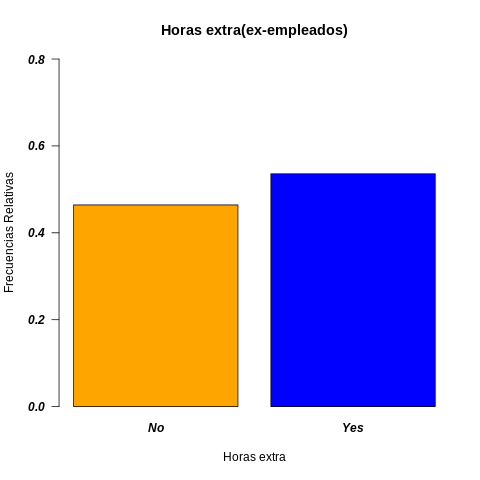

In [49]:
%%R
barplot(prop.table(table(dfDatos[which(dfDatos$Attrition == "Yes"), "OverTime"])),col=c("orange","blue"),main="Horas extra(ex-empleados)",ylim=c(0,0.8),
        ylab ="Frecuencias Relativas", xlab ="Horas extra", las=1,font.axis=4)

No muy significativamente, pero la mayoría de los empleados que han abandonado su puesto de trabajo realizaban horas extra, por lo que a primera vista parece una hipótesis acertada. Sin embargo, tendremos que hacer un análisis más concreto y detallado.

**Hipótesis 3:** La gente que vive más lejos de su puesto de trabajo es más propensa a abandonarlo.

---



In [50]:
%%R
m1 <- mean(dfDatos[which(dfDatos$Attrition == "Yes"), "DistanceFromHome"])
m2 <- mean(dfDatos[which(dfDatos$Attrition == "No"), "DistanceFromHome"])
print(paste('La media de la distancia hasta el trabajo de la gente que lo ha abandonado es:', m1))
print(paste('La media de la distancia hasta el trabajo de la gente que no lo ha abandonado es:', m2))

[1] "La media de la distancia hasta el trabajo de la gente que lo ha abandonado es: 10.6329113924051"
[1] "La media de la distancia hasta el trabajo de la gente que no lo ha abandonado es: 8.91565287915653"


Como se puede ver, la media de las distancias hasta el trabajo de la gente que lo ha abandonado es mayor que la que no. Por lo que, de nuevo, parece que la hipótesis propuesta va por buen camino.

**Hipótesis 4:** La gente cuyo grado de satisfacción con su trabajo es bajo tiende a abandonarlo más que el resto.

---



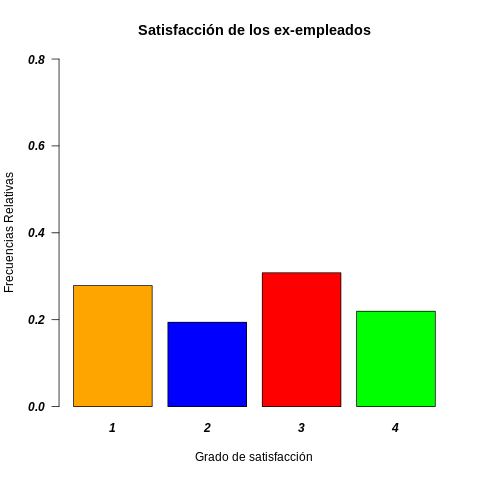

In [51]:
%%R
barplot(prop.table(table(dfDatos[which(dfDatos$Attrition == "Yes"), "JobSatisfaction"])),col=c("orange","blue", "red", "green"),main="Satisfacción de los ex-empleados",ylim=c(0,0.8),
        ylab ="Frecuencias Relativas", xlab ="Grado de satisfacción", las=1,font.axis=4)

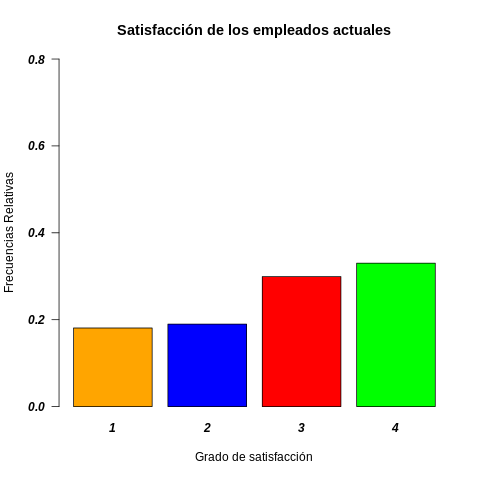

In [52]:
%%R
barplot(prop.table(table(dfDatos[which(dfDatos$Attrition == "No"), "JobSatisfaction"])),col=c("orange","blue", "red", "green"),main="Satisfacción de los empleados actuales",ylim=c(0,0.8),
        ylab ="Frecuencias Relativas", xlab ="Grado de satisfacción", las=1,font.axis=4)

Como era de esperar, la gente con grado bajo de satisfacción contribuye bastante al abandono de los puestos de trabajo, más que los que están totalmente satisfechos. Sin embargo, parece que no es la causa principal de los abandonos, pues el número de personas que lo hacen con un grado de satisfacción alto es muy elevado.

**Hipótesis 5:** los empleados del departamento de investigación y desarrollo son los que más abandonan la empresa.

---



In [53]:
%%R
ventas <- length(which(dfDatos$Department == "Sales"))
invest <- length(which(dfDatos$Department == "Research & Development"))
rrhh <- length(which(dfDatos$Department == "Human Resources"))
print(ventas)
print(invest)
print(rrhh)

[1] 446
[1] 961
[1] 63


Como podemos observar en los datos, el departamento con el mayor número de empleados es el de investigación y desarrollo, por lo que es lógico pensar que este también será el que tenga mayor porcentaje de abandono en la empresa.

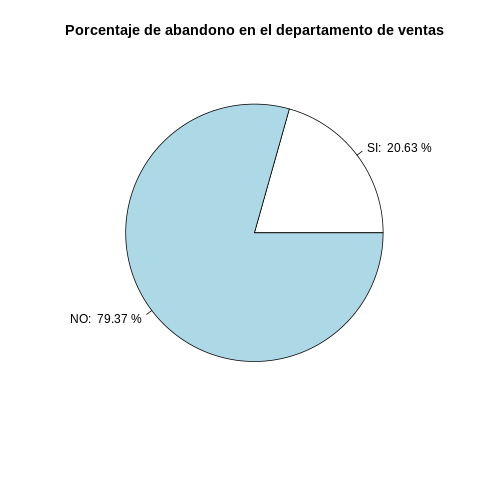

In [54]:
%%R
x <- c(length(which(dfDatos$Attrition == "Yes" & dfDatos$Department == "Sales")), length(which(dfDatos$Attrition == "No" & dfDatos$Department == "Sales")))
total <- length(which(dfDatos$Department == "Sales"))
labels <- c(paste("SI: ",round(100*(length(which(dfDatos$Attrition == "Yes" & dfDatos$Department == "Sales"))/total),2),"%"), paste("NO: ",round(100*(length(which(dfDatos$Attrition == "No" & dfDatos$Department == "Sales"))/total),2),"%"))
pie(x, label = labels, main="Porcentaje de abandono en el departamento de ventas")

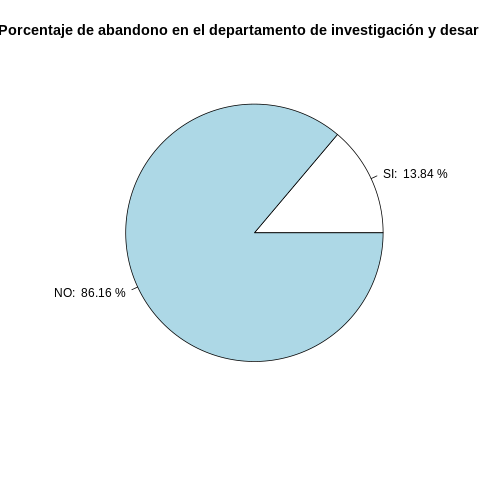

In [55]:
%%R
x <- c(length(which(dfDatos$Attrition == "Yes" & dfDatos$Department == "Research & Development")), length(which(dfDatos$Attrition == "No" & dfDatos$Department == "Research & Development")))
total <- length(which(dfDatos$Department == "Research & Development"))
labels <- c(paste("SI: ",round(100*(length(which(dfDatos$Attrition == "Yes" & dfDatos$Department == "Research & Development"))/total),2),"%"), paste("NO: ",round(100*(length(which(dfDatos$Attrition == "No" & dfDatos$Department == "Research & Development"))/total),2),"%"))
pie(x, label = labels, main="Porcentaje de abandono en el departamento de investigación y desarrollo")

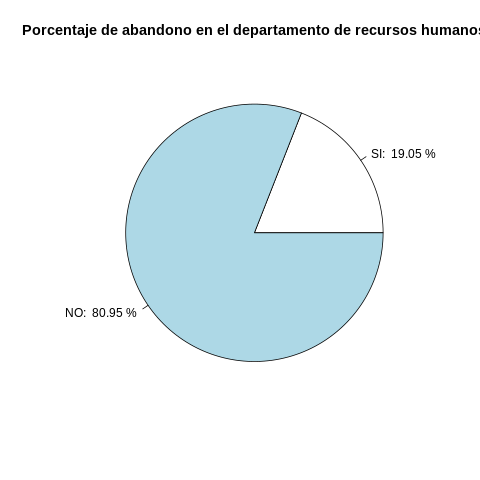

In [56]:
%%R
x <- c(length(which(dfDatos$Attrition == "Yes" & dfDatos$Department == "Human Resources")), length(which(dfDatos$Attrition == "No" & dfDatos$Department == "Human Resources")))
total <- length(which(dfDatos$Department == "Human Resources"))
labels <- c(paste("SI: ",round(100*(length(which(dfDatos$Attrition == "Yes" & dfDatos$Department == "Human Resources"))/total),2),"%"), paste("NO: ",round(100*(length(which(dfDatos$Attrition == "No" & dfDatos$Department == "Human Resources"))/total),2),"%"))
pie(x, label = labels, main="Porcentaje de abandono en el departamento de recursos humanos")

Tras realizar el análisis, hemos observado que no estábamos en lo cierto en relación con nuestra hipotesis. Los resultados finales han sido que el departamento de ventas es el que tiene el porcentaje de abandonos de la empresa más alto de todos (20,63%).

## ANÁLISIS DE DATOS ATÍPICOS

Tras realizar esta indagación inicial, el siguiente paso ha sido proceder con el análisis de datos atípicos o outliers. Estos son valores que difieren mucho del resto según una medida estadística y que pueden llegar a entorpecer y sesgar el modelo predictivo o clasificación que pueda realizarse.

In [57]:
%%R
print(summary(dfDatos$DailyRate))
print(summary(dfDatos$MonthlyRate))
print(summary(dfDatos$MonthlyIncome))
print(summary(dfDatos$Age))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  102.0   465.0   802.0   802.5  1157.0  1499.0 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2094    8047   14236   14313   20462   26999 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1009    2911    4919    6503    8379   19999 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   30.00   36.00   36.92   43.00   60.00 


En nuestro caso, hemos elegido los atributos DailyRate, MonthlyIncome, MonthlyRate y Age, ya que son aquellos que más rango de valores pueden dar y, por lo tanto, los que más posibilidades tienen de tener valores atípicos.

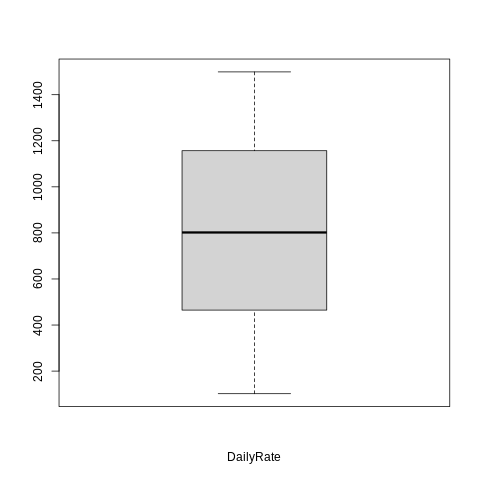

In [66]:
%%R
boxplot(dfDatos$DailyRate, xlab = "DailyRate", range = 3)

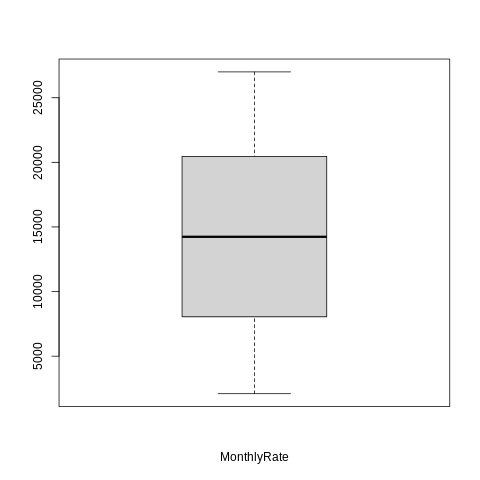

In [67]:
%%R
boxplot(dfDatos$MonthlyRate, xlab = "MonthlyRate", range = 3)

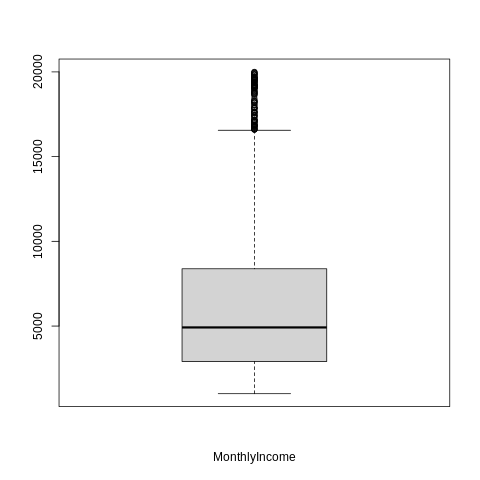

In [59]:
%%R
boxplot(dfDatos$MonthlyIncome, xlab = "MonthlyIncome", range = 1.5)

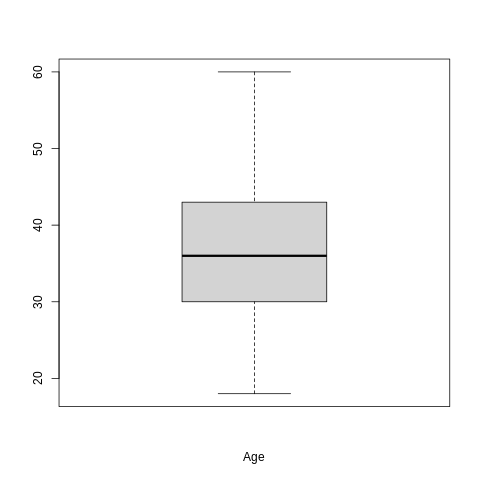

In [62]:
%%R
boxplot(dfDatos$Age, xlab = "Age", range = 1.5)

Rango intercuartílico = diferencia entre el primer cuartil y el tercer cuartil. En un diagrama de caja se considera un valor atípico el que se encuentra 1,5 veces esa rango de uno de esos cuartiles (atípico leve) o a 3 veces (atípico extremo). 
Tras realizar el análisis de las variables vimos que ninguna contaba con atípicos extremos, pero, sin embargo, MonthlyIncome si que tenían atípicos. Debido a esto, optamos por mantener aún dichos valores para más tarde y tras realizar un análisis más profundo de como influyen en la predicción, decidir si eliminarlos de nuestro conjunto de datos o no.

### Puntos de apalancamiento

Son valores para los que su presencia o ausencia modifica notablemente un modelo de regresión. En nuestro caso, creimos interesante observar su efecto sobre el atributo JobSatisfaction, atributo numérico del 1 al 4 que indica la satisfacción del empleado en el trabajo.

$plots
$plots[[1]]

$plots[[2]]

$plots[[3]]


$outliers
$outliers[[1]]
      obs      dbetas
22     22 -0.06133592
27     27 -0.06911077
30     30  0.07537980
34     34  0.06071136
35     35  0.06107023
40     40 -0.06909438
50     50  0.05514114
53     53 -0.06518437
62     62  0.05290206
64     64 -0.06268390
69     69 -0.07166147
87     87 -0.05513696
106   106 -0.05364793
119   119  0.06083644
130   130 -0.05352019
149   149 -0.06668349
175   175 -0.05710802
194   194  0.05463305
215   215 -0.05783761
227   227  0.06103958
231   231  0.05727235
234   234 -0.06312772
257   257 -0.06052121
271   271  0.05898031
273   273  0.06308032
290   290  0.05314909
291   291  0.08620396
303   303 -0.06070710
327   327 -0.05255464
337   337 -0.07685355
363   363  0.06061379
383   383 -0.06446517
386   386  0.05978870
395   395 -0.06967203
419   419  0.05916190
424   424 -0.05691097
471   471  0.05268405
505   505 -0.06332511
515   515 -0.07830753
517   517 -0.05716528
551   551 -0.07695534
558 

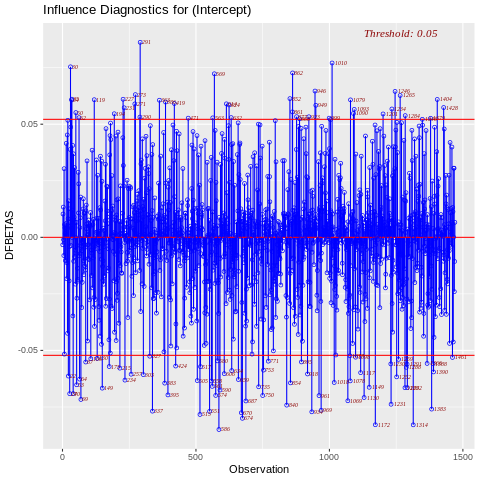

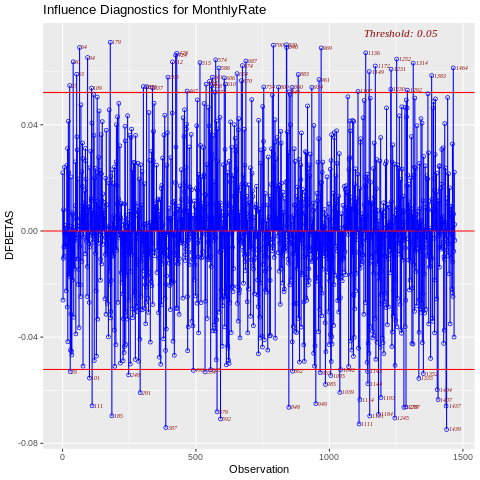

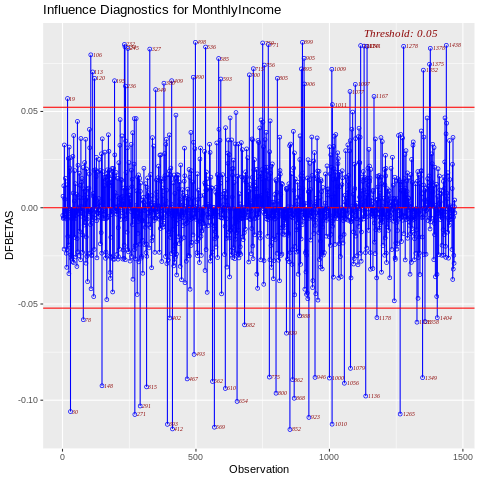

In [71]:
%%R
if (!require("olsrr")) install.packages("olsrr")
library(olsrr)

fit_lm <- lm(JobSatisfaction ~ MonthlyRate + MonthlyIncome, data = dfDatos)
ols_plot_dfbetas(fit_lm, print_plot = FALSE)

Tras ver que las variables MonthlyIncome y MonthlyRate eran las que más atípicos tenían, decidimos estudiarlas más detenidamente. Como se puede ver en las gráficas, hay varios valores atípicos, pero ninguno que destaque especialmente por encima del resto.

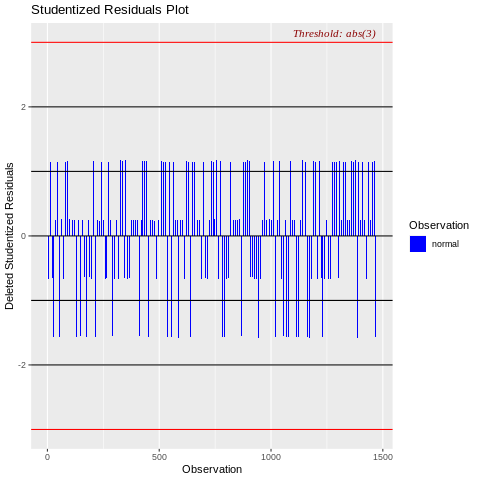

In [69]:
%%R

ols_plot_resid_stud(fit_lm)

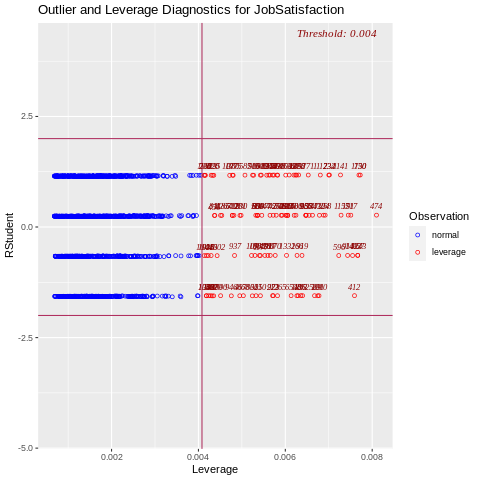

In [70]:
%%R

ols_plot_resid_lev(fit_lm)

Esta representación permite aclarar si determinados datos son puntos de apalancamiento, atípicos o ambos. En nuestro caso, en rojo se pueden ver los puntos de apalancamiento, que tienen un gran efecto sobre el resultado de la regresión pero son considerados dentro de la normalidad.

La ausencia de valores atípicos extremos puede indicar que los datos ya han sido preprocesados por los científicos de datos de IBM (creadores de este dataset), por lo que hemos decidido no eliminarlos.

### Analisis de Correlación

Una forma cualitativa de análisis de correlación consiste en representar atributos en gráficos de dispersión. En este caso empezamos a centrarnos en uno de los objetivos finales, que era realizar un clasificador para la clase Attrition. 

In [ ]:
%%R
if (!require("car")) install.packages("car")
library(car)
#Al realizar el repaso final del trabajo nos ha dado error, a pesar de haberlo ejecutado previamente sin ningun problema 

scatterplot(Age ~ MonthlyIncome | Attrition, data = dfDatos, main ="Diagrama de Dispersión", xlab ="MonthlyIncome", ylab ="Age",smoother = TRUE)

Con las varibles que habiamos observado más datos atípicos decidimos probar su correlacción con Attrition, como ya hemos dicho, clase de uno de los modelos que pensamos conseguir. Como se puede ver, están fuertemente relacinadas, a menos edad, menos salario y, por ende, más abandono del puesto de trabajo. 

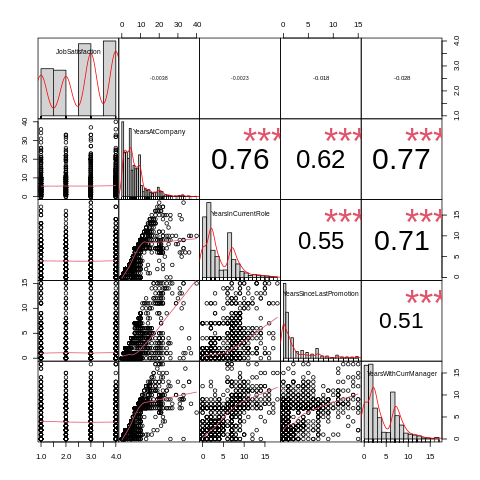

In [88]:
%%R
if (!require("PerformanceAnalytics")) install.packages("PerformanceAnalytics")
library(PerformanceAnalytics)

chart.Correlation(dfDatos[,c("JobSatisfaction", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager")])

Como se puede observar los atributos "year", todas están relacionadas entre sí, lo cuál era de esperar, pues por ejemplo, a más años en la empresa, más probable es que lleves varios años en un rol fijo. Sin embargo, algo que no nos esperábamos es la baja correlación que tienen con la satisfacción en el trabajo del empleado. Por lo tanto se tendrá en cuenta para reducir la dimensionalidad de cara a una regresión sobre el mencionado atributo.

## SELECCIÓN DE ATRIBUTOS

A continuación, se pasará a la parte de selección de atributos. Según nuestro conjunto de datos, se trata de una fase bastante importante, ya que 35 atributos creemos que es demasiado para obtener un modelo predictivo que nos de buenos resultados. Es por eso que necesitaremos comparar distintos modelos según una medida de calidad probando la ausencia o presencia de atributos para medir su importancia. 

En primer lugar, observando las instancias de los atributos, vimos que había algunos que solo tenian un valor posible. Estos eran: EmployeeCount, Over18 y StandardHours. Pensamos, por lo tanto, que estos atributos no eran de gran interés, ya que la información que aportaban era nula, es decir, sería mejor eliminarlos para no entorpecer la generacion del mejor modelo final.


### Selección de subconjunto filtrado

Se refiere a aplicar un subconjunto de atributos a un modelo y compararlo con otro subconjunto.

In [89]:
%%R
if (!require("survey", lib.loc = lib_loc)) install.packages("survey", lib = lib_loc)
if (!require("mitools", lib.loc = lib_loc)) install.packages("mitools", lib = lib_loc)
if (!require("relaimpo", lib.loc = lib_loc)) install.packages("relaimpo", lib = lib_loc)
library(relaimpo, lib.loc = lib_loc)

fit_lm <- lm(JobSatisfaction ~ Age + DailyRate + DistanceFromHome + EmployeeNumber + HourlyRate + Education + EnvironmentSatisfaction + JobInvolvement + JobLevel + MonthlyIncome + MonthlyRate + NumCompaniesWorked + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager, data = dfDatos) 
calc.relimp(fit_lm) 

R[write to console]: Loading required package: survey

R[write to console]: Loading required package: grid

R[write to console]: Loading required package: Matrix

R[write to console]: Loading required package: survival

R[write to console]: 
Attaching package: ‘survival’


R[write to console]: The following object is masked from ‘package:caret’:

    cluster


R[write to console]: 
Attaching package: ‘survey’


R[write to console]: The following object is masked from ‘package:graphics’:

    dotchart


R[write to console]: Loading required package: mitools

R[write to console]: Loading required package: relaimpo

R[write to console]: Loading required package: MASS

R[write to console]: 
Attaching package: ‘MASS’


R[write to console]: The following object is masked from ‘package:rstatix’:

    select


R[write to console]: The following object is masked from ‘package:olsrr’:

    cement


R[write to console]: The following object is masked from ‘package:dplyr’:

    select


R[write to

Response variable: JobSatisfaction 
Total response variance: 1.21627 
Analysis based on 1470 observations 

23 Regressors: 
Age DailyRate DistanceFromHome EmployeeNumber HourlyRate Education EnvironmentSatisfaction JobInvolvement JobLevel MonthlyIncome MonthlyRate NumCompaniesWorked PercentSalaryHike PerformanceRating RelationshipSatisfaction StockOptionLevel TotalWorkingYears TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager 
Proportion of variance explained by model: 1.62%
Metrics are not normalized (rela=FALSE). 

Relative importance metrics: 

                                  lmg
Age                      2.473349e-04
DailyRate                9.243821e-04
DistanceFromHome         1.630901e-05
EmployeeNumber           2.001746e-03
HourlyRate               4.955642e-03
Education                4.310234e-05
EnvironmentSatisfaction  7.118561e-05
JobInvolvement           4.046583e-04
JobLevel                 2.543953e-04

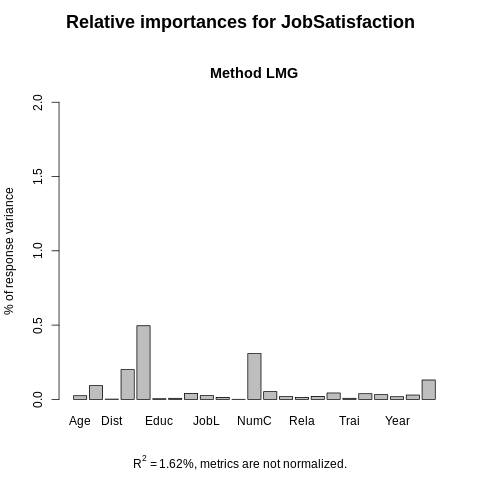

In [ ]:
%%R
plot(calc.relimp(fit_lm) )

Hemos insertado todos los atributos para compararlos segun una medida de calidad realizando todas las combinaciones posibles. De esta manera no solo se obtiene el mejor modelo, si no también la importancia relativa de cada atributo.
Como podemos ver, algunos atributos que sobresalen son el de HourlyRate, NumCompaniesWorked o YearsWithCurrenManager. Sin embargo, los que parecen menos significativos pueden ser DistanceFromHome o MonthlyRate entre otros. Para corroborar estos resulltados, realizaremos más test en base a otras medidas de calidad.

### Selección por ranking

Otra forma para obtener la importancia de los atributos es utilizar medidas que son independientes del modelo, se utiliza un criterio, por ejemplo usando gain ratio, information gain o symmetrical uncertainty y se seleccionan los atributos que superan un determinado umbral. En este caso se miden en base a la Attrition.

In [ ]:
%%R
if (!require("FSelectorRcpp", lib.loc = lib_loc)) install.packages("FSelectorRcpp", lib = lib_loc)
library(FSelectorRcpp, lib.loc = lib_loc)
formula <- to_formula( c("Age","BusinessTravel","DailyRate","Department","DistanceFromHome","Education","EducationField","EmployeeCount",
                         "EmployeeNumber","EnvironmentSatisfaction","Gender","HourlyRate","JobInvolvement","JobLevel","JobRole","JobSatisfaction",
                         "MaritalStatus","MonthlyIncome","MonthlyRate","NumCompaniesWorked","Over18","OverTime","PercentSalaryHike","PerformanceRating",
                         "RelationshipSatisfaction","StandardHours","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance",
                         "YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"), "Attrition")

print("gain ratio")
print(information_gain(formula = formula, data = dfDatos, type = "gainratio"))

print("information gain")
print(information_gain(formula = formula, data = dfDatos, type = "infogain"))

print("symmetrical uncertainty")
print(information_gain(formula = formula, data = dfDatos, type = "symuncert"))

[1] "gain ratio"
                 attributes   importance
1                       Age 0.0246080360
2            BusinessTravel 0.0102186872
3                 DailyRate          NaN
4                Department 0.0046056629
5          DistanceFromHome          NaN
6                 Education          NaN
7            EducationField 0.0035672979
8             EmployeeCount          NaN
9            EmployeeNumber          NaN
10  EnvironmentSatisfaction          NaN
11                   Gender 0.0006497395
12               HourlyRate          NaN
13           JobInvolvement          NaN
14                 JobLevel 0.0330880768
15                  JobRole 0.0149047575
16          JobSatisfaction          NaN
17            MaritalStatus 0.0141639346
18            MonthlyIncome 0.0386852089
19              MonthlyRate          NaN
20       NumCompaniesWorked          NaN
21                   Over18          NaN
22                 OverTime 0.0464745871
23        PercentSalaryHike          NaN

Tras esto comprobamos que algunos atributos no tenían gran importancia de cara a la predicción de si un empleado
abandonará la empresa o no. En ambas tres métricas los resultados eran similares, indicándonos que atributos como RelationshipSatisfaction , 
WorkLifeBalance, EmployeeNumber no ayudarían a entrenar correctamente nuestro modelo. De hecho este último se trata de un identificador, por
lo que es normal obtener este resultado.


### Importancia por clase

Se va a predecir de nuevo para el atributo attrition

R[write to console]: Loading required package: e1071

R[write to console]: 
Attaching package: ‘e1071’


R[write to console]: The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness




1 package is needed and is not installed. (randomForest). Would you like to try to install it now?
1: yes
2: no

Selection: yes


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/randomForest_4.6-14.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 80074 bytes (78 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

rf variable importance

  only 20 most important variables shown (out of 45)

                                Importance
OverTimeYes                         23.496
MonthlyIncome                       13.451
Age                                 10.696
StockOptionLevel                     8.710
TotalWorkingYears                    8.656
JobLevel                             8.645
YearsAtCompany                       6.216
YearsInCurrentRole                   5.797
JobSatisfaction                      5.376
YearsWithCurrManager                 5.345
MaritalStatusSingle                  5.148
JobInvolvement                       4.762
NumCompaniesWorked                   4.249
EnvironmentSatisfaction              3.924
YearsSinceLastPromotion              3.825
BusinessTravelTravel_Frequently      3.466
DepartmentSales                      3.185
EducationFieldMarketing              3.162
JobRoleLaboratory Technician         3.076
JobRoleSales Representative          2.890


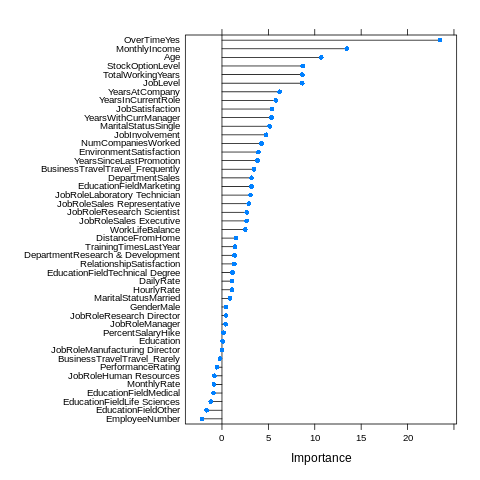

In [ ]:
%%R
if (!require("caret", lib.loc = lib_loc)) install.packages("caret", lib = lib_loc)
if (!require("e1071", lib.loc = lib_loc)) install.packages("e1071", lib = lib_loc)

library(caret, lib.loc = lib_loc)
library(e1071, lib.loc = lib_loc)

formula1 <- to_formula( c("Age","BusinessTravel","DailyRate","Department","DistanceFromHome","Education","EducationField",
                         "EmployeeNumber","EnvironmentSatisfaction","Gender","HourlyRate","JobInvolvement","JobLevel","JobRole","JobSatisfaction",
                         "MaritalStatus","MonthlyIncome","MonthlyRate","NumCompaniesWorked","OverTime","PercentSalaryHike","PerformanceRating",
                         "RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance",
                         "YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"), "Attrition")

control <- trainControl(method="repeatedcv", number = 3, repeats = 3)
caret_rf <- train(formula1, data = dfDatos, method = "rf", preProcess = "scale",
                  trControl = control,
                  importance = TRUE) #este parámetro hace que se diferencia por clase
importancia <- varImp(caret_rf, scale = FALSE)
print(importancia)
plot(importancia)

Los resultados del anterior análisis nos mostraban cuales eran los atributos más importantes de cara a la predición de attrition, 
pero decidimos hacer un análisis más exaustivo para descartar definitivamente los que empeoraban nuestro proceso. A su vez, podríamos contrastar los resultados y comprobar cuales eran los más significativos teniendo en cuenta los posibles valores que puede tomar, para así conocerlo en reducciones de dimensionalidad futuras. Con esto conseguimos ratificar los resultados anteriores y darnos cuenta que algunos atributos como MonthlyRate deberían ser eliminados del conjunto de datos.


En la parte de clasificación será cuando verdaderamente se seleccionen los atributos concretos que mayor importancia tienen según estos estudios.

## REDUCCIÓN DE DIMENSIONALIDAD

Por otro lado, una vez eliminados los atributos redundantes o irrelevantes, habrá que reducir la dimensionalidad, es decir, el número de variables que se tratan.

Utilizaremos LDA y dado que se trata de un problema de clasificación, es necesario dividir el conjunto de datos en un conjunto de entrenamiento y uno de validación.

In [ ]:
%%R
if (!require("caret", lib.loc = lib_loc)) install.packages("caret", lib = lib_loc)
library(caret, lib.loc = lib_loc)

set.seed(1234) # la semilla aleatoria para poder hacer los resultados reproducibles

dfDatos$Attrition <- as.factor(dfDatos$Attrition)
entrena      <- createDataPartition(dfDatos$Attrition, p=0.6, list=FALSE)
setEntrena   <- dfDatos[entrena,]  #el conjunto de entrenamiento
setValida    <- dfDatos[-entrena,] #el conjunto de validación


In [ ]:
%%R
library(MASS)
res.lda <- lda(Attrition ~  EducationField + MonthlyRate + JobRole + BusinessTravel + Education + PercentSalaryHike + Gender + MaritalStatus, data = setEntrena)
res.lda$scaling # se muestran los coeficientes de los atributos en las proyecctiones de las rectas obtenidas

                                          LD1
EducationFieldLife Sciences     -5.702512e-01
EducationFieldMarketing          1.088942e-01
EducationFieldMedical           -6.136395e-01
EducationFieldOther             -4.777890e-01
EducationFieldTechnical Degree   4.150452e-01
MonthlyRate                      9.051849e-06
JobRoleHuman Resources           1.108156e+00
JobRoleLaboratory Technician     1.459992e+00
JobRoleManager                  -4.379362e-01
JobRoleManufacturing Director   -3.029299e-02
JobRoleResearch Director        -3.636549e-01
JobRoleResearch Scientist        9.486494e-01
JobRoleSales Executive           5.833786e-01
JobRoleSales Representative      1.591403e+00
BusinessTravelTravel_Frequently  1.519017e+00
BusinessTravelTravel_Rarely      8.492121e-01
Education                        4.180676e-02
PercentSalaryHike                7.381163e-03
GenderMale                       9.006701e-02
MaritalStatusMarried             2.213071e-01
MaritalStatusSingle              1

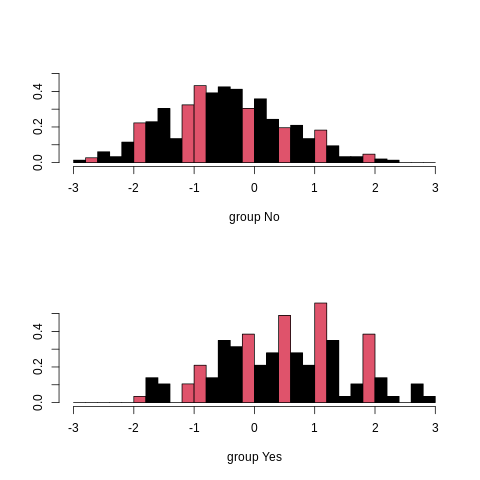

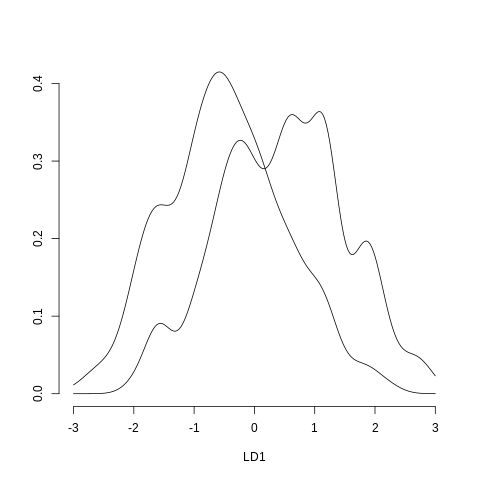

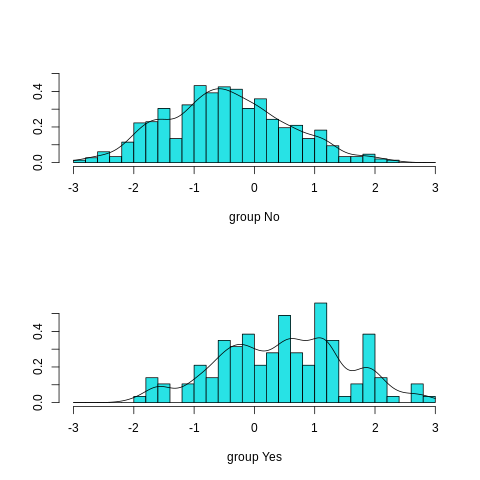

In [ ]:
%%R
plot(res.lda, 
     panel = function(x, y, ...) { points(x, y, cex = 2, ...) },
     col = as.integer(setEntrena$Attrition), pch = 20)
plot(res.lda, dimen = 1, type ="density")
plot(res.lda, dimen = 1, type ="b")

Tras estudiar en profundidad los atributos aun no borrados pero posibles candidatos para ello, decidimos no eliminar ninguno más. Esta fue la decisión tomada, pues los resultados eran diferentes en cada estudio y pudimos observar que dependiendo del valor que tomaban aportaban más o menos. Las clases no están completamente solapadas, aunque si toman una forma similar los datos están desplazados.

In [ ]:
%%R
if (!require("e1071", lib.loc = lib_loc)) install.packages("e1071", lib = lib_loc)
library(e1071, lib.loc = lib_loc)

predice.modelo.lda <- predict(res.lda, setValida)
c <- confusionMatrix(predice.modelo.lda$class, setValida$Attrition)
print(c)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  486  82
       Yes   7  12
                                          
               Accuracy : 0.8484          
                 95% CI : (0.8168, 0.8764)
    No Information Rate : 0.8399          
    P-Value [Acc > NIR] : 0.3096          
                                          
                  Kappa : 0.1676          
                                          
 Mcnemar's Test P-Value : 4.365e-15       
                                          
            Sensitivity : 0.9858          
            Specificity : 0.1277          
         Pos Pred Value : 0.8556          
         Neg Pred Value : 0.6316          
             Prevalence : 0.8399          
         Detection Rate : 0.8279          
   Detection Prevalence : 0.9676          
      Balanced Accuracy : 0.5567          
                                          
       'Positive' Class : No              
                              

Tras esta prueba vemos que la precisión es superior a la tasa de no información, lo cual es bueno. Sin embargo, ambos valores son muy próximos, cosa que mejora reduciendo la dimensionalidad tras eliminar los atributos seleccionados en el análisis previo.
La clase toma el valor NO muchas veces respecto a SI, por lo que un balanceo de los datos ayudaría en el aprendizaje. 

## CLASIFICACIÓN

Llegados a este punto, habíamos barajado las opciones de clasificar la clase Attrition o pedecir el valor de JobSatisfaction, y decidimos decantarnos por la primera opción, ya que se trataba del objetivo principal por el cúal se había creado este conjunto de datos. 

Para ello, se han utilizado distintas técnicas (principalmente las más comunmente utilizadas) para posteriormente elegir la mejor de las mismas.

### Naive Bayes

En primer lugar, se ha procedido con el clasificador Naive Bayes eliminando los  atributos que peor rendimiento han proporcionado en los análisis anteriores: "DailyRate","DistanceFromHome","Education","EmployeeNumber","HourlyRate","MonthlyRate","PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StockOptionLevel","TrainingTimesLastYear","WorkLifeBalance".

Este se basa en aplicar probabilidades de los sucesos y en él, los atributos deben ser independientes.

In [92]:
%%R
if (!require("caTools", lib.loc = lib_loc)) install.packages("caTools", lib = lib_loc)
library(caTools, lib.loc = lib_loc)
 
atributos <- c("Attrition","TotalWorkingYears","Age","Department","Gender","JobLevel","JobRole","MaritalStatus","MonthlyIncome","OverTime"
                ,"StockOptionLevel","YearsAtCompany","YearsInCurrentRole","YearsWithCurrManager","JobSatisfaction","JobInvolvement","NumCompaniesWorked","EnvironmentSatisfaction"
                ,"YearsSinceLastPromotion","EducationField","BusinessTravel")

set.seed(1)
sample <- sample.split(dfDatos$Attrition, SplitRatio = .7)
setEntrena <- subset(dfDatos[, atributos], sample == TRUE)
setTest    <- subset(dfDatos[, atributos], sample == FALSE)

print(summary(setEntrena$Attrition))
#print(round(summary(setEntrena$Attrition)/nrow(setEntrena),2))

   Length     Class      Mode 
     1029 character character 


R[write to console]: Loading required package: naivebayes

R[write to console]: naivebayes 0.9.7 loaded



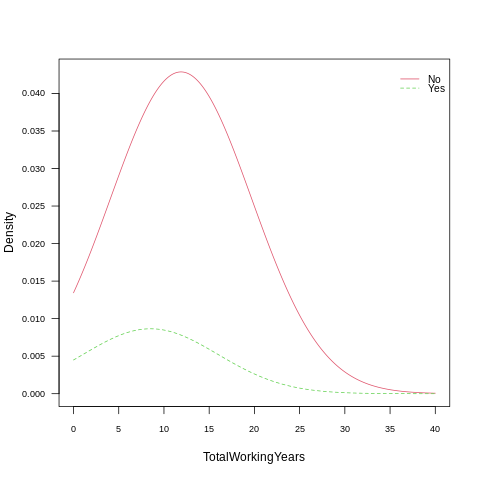

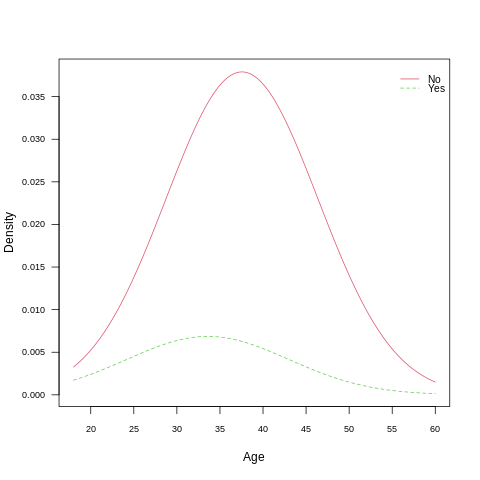

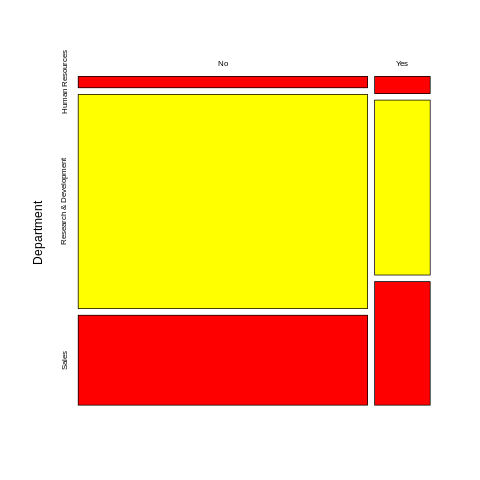

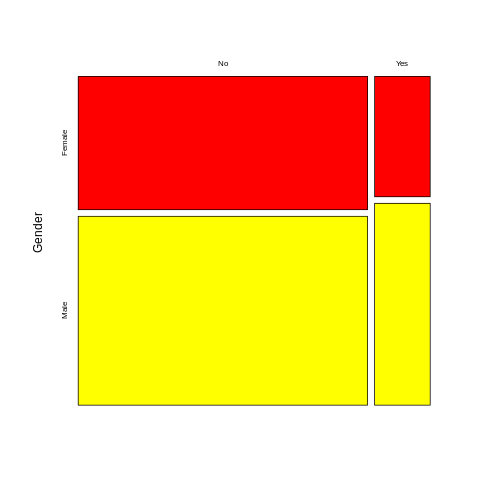

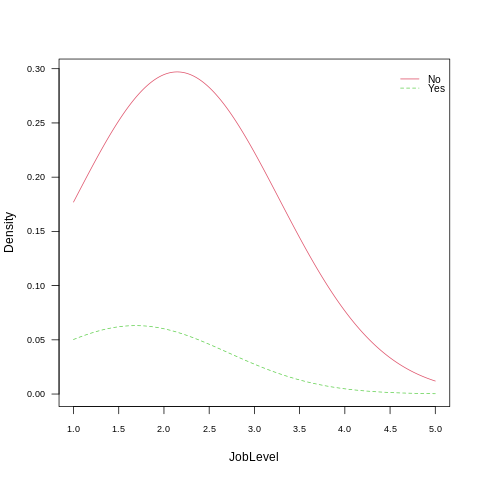

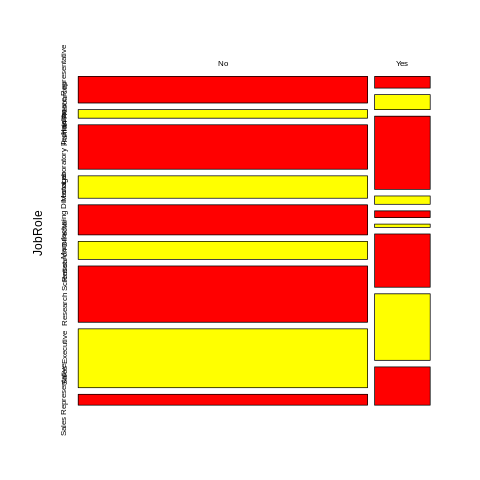

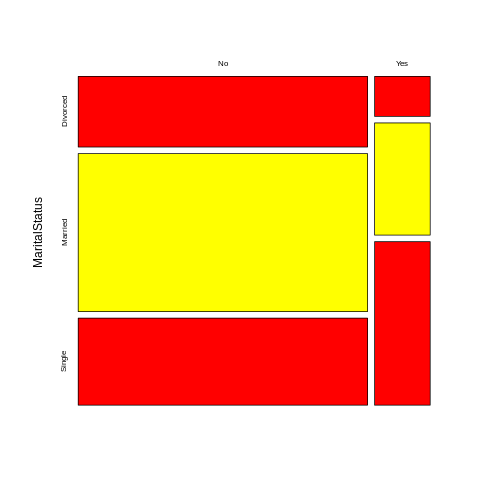

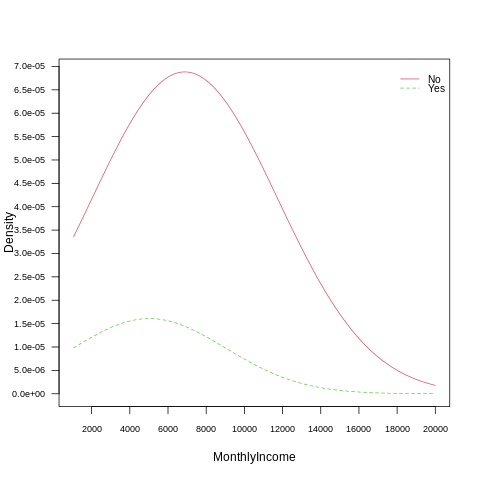

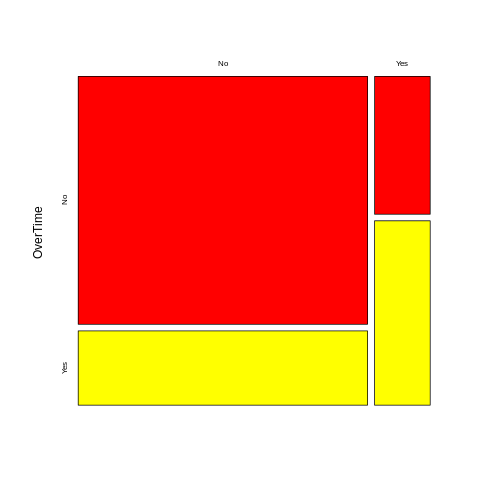

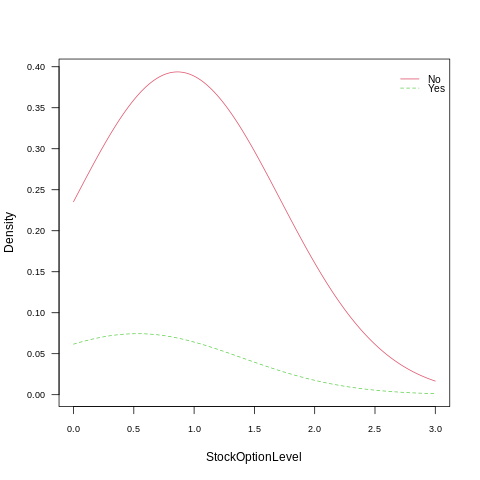

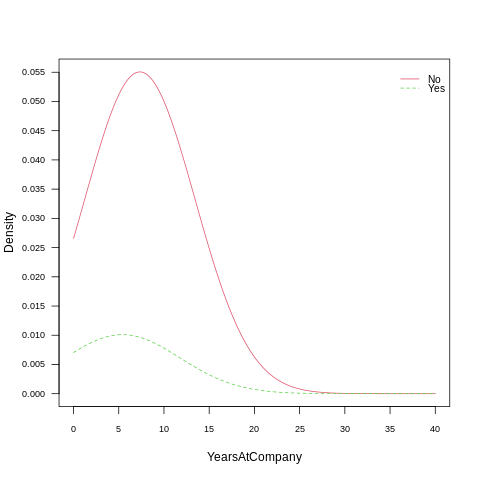

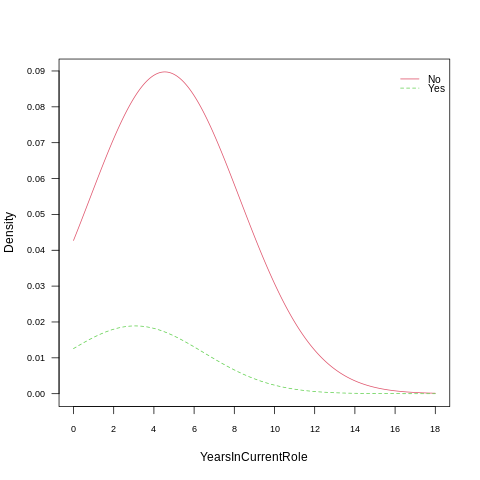

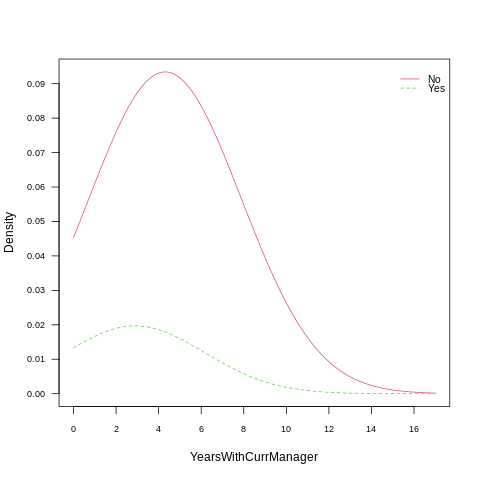

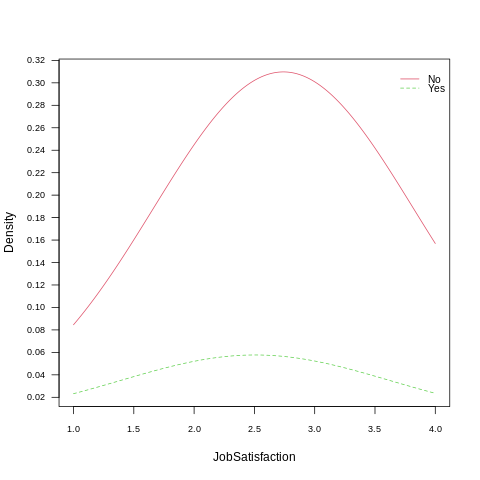

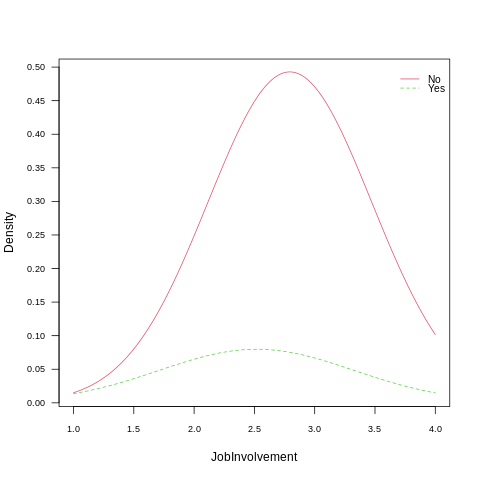

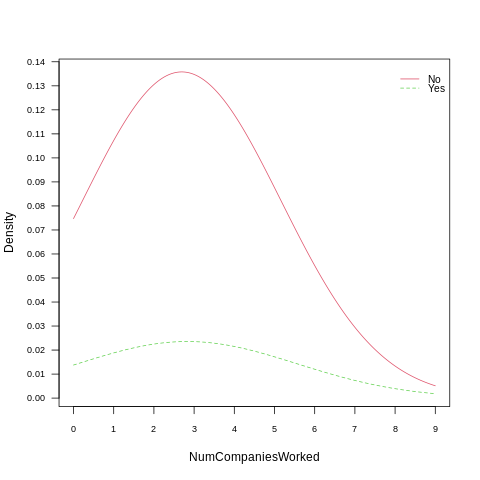

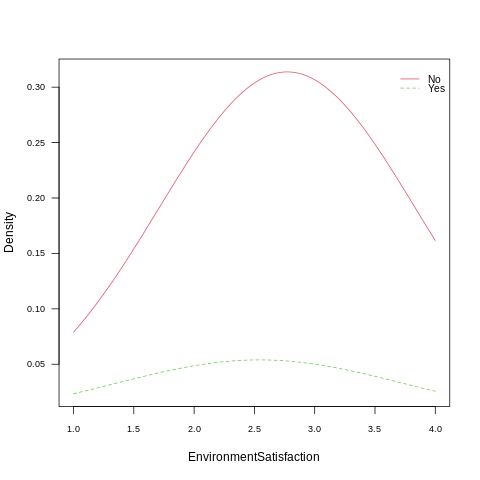

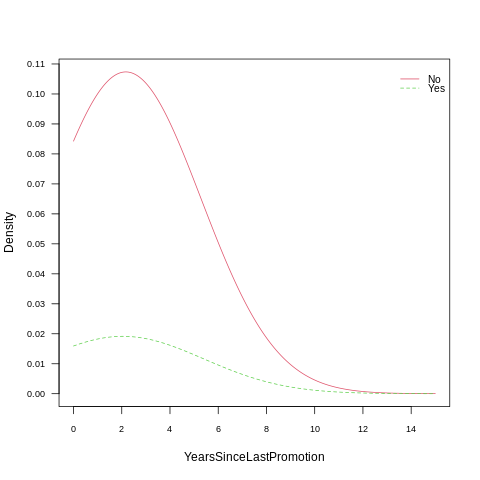

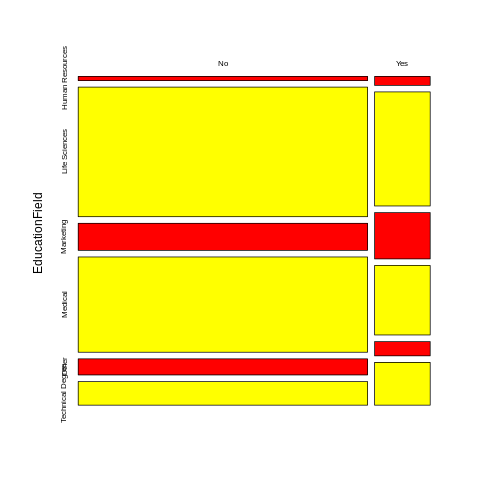

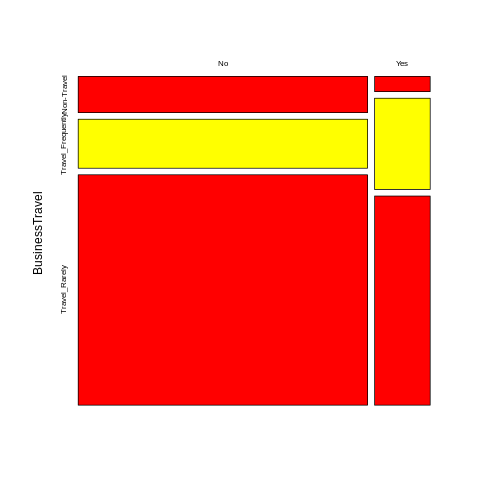

In [ ]:
%%R
if (!require("naivebayes", lib.loc = lib_loc)) install.packages("naivebayes", lib = lib_loc)
library(naivebayes, lib.loc = lib_loc)

modelo.nb <- naive_bayes(Attrition ~ TotalWorkingYears + Age + Department + Gender + JobLevel + JobRole + MaritalStatus + MonthlyIncome + OverTime
                + StockOptionLevel + YearsAtCompany + YearsInCurrentRole + YearsWithCurrManager + JobSatisfaction + JobInvolvement + NumCompaniesWorked + EnvironmentSatisfaction
                + YearsSinceLastPromotion + EducationField + BusinessTravel, data = setEntrena)
modelo.nb$tables
plot(modelo.nb)

Para la matriz de confusion será necesario determinar la prediccion del modelo sobre el conjunto de test.

In [ ]:
%%R
if (!require("caret", lib.loc = lib_loc)) install.packages("caret", lib = lib_loc)
if (!require("e1071", lib.loc = lib_loc)) install.packages("e1071", lib = lib_loc)

library(caret, lib.loc = lib_loc)

predice.modelo.nb <- predict(modelo.nb,  newdata = setTest, type = "class")
c <- confusionMatrix(table(predice.modelo.nb, setTest$Attrition), mode="everything")

print(c)

Confusion Matrix and Statistics

                 
predice.modelo.nb  No Yes
              No  318  29
              Yes  52  42
                                         
               Accuracy : 0.8163         
                 95% CI : (0.777, 0.8514)
    No Information Rate : 0.839          
    P-Value [Acc > NIR] : 0.91136        
                                         
                  Kappa : 0.3988         
                                         
 Mcnemar's Test P-Value : 0.01451        
                                         
            Sensitivity : 0.8595         
            Specificity : 0.5915         
         Pos Pred Value : 0.9164         
         Neg Pred Value : 0.4468         
              Precision : 0.9164         
                 Recall : 0.8595         
                     F1 : 0.8870         
             Prevalence : 0.8390         
         Detection Rate : 0.7211         
   Detection Prevalence : 0.7868         
      Balanced Accuracy : 0.725

La acuraccy es bastante elevada, por lo que Naive Bayes aparentemente no clasifica mal el atributo Attrition. Sin embargo, como podemos ver, esto no se hace tan bien cuando la clase toma el valor *yes*, la especificidad nos lo demuestra. Es 0.25 puntos más baja que la sensitividad, la cual se refiere a las clasificaciones cuando la clase toma el valor *no*. La tasa sin información, como se puede apreciar, es alta. De un 0,839, lo cual significa que, si clasificaramos como la clase mayoritaria todas las instancias, acertaríamos en un 83,9% de las veces. Visto esto y con un modelo con 0.816 de accuracy, quizá este no sea tan bueno como creíamos, pues conseguiríamos una accuracy mejor simplemente asignando la clase *no*. Aún así, esto se irá viendo más adelante, pues clasificar bien la clase minoritaria también es importante. 


Utilizaremos este modelo como punto de partida, a partir del cual comparar resultados con otros clasificadores.

Se ha probado a quitar los atributos EducationField y BusinessTravel, pues estaban en duda debido a los resultados obtenidos en el análisis previo. Sin embargo, esto no mejora la clasificación.

### Árboles de Decisión

#### RPART


Confusion Matrix and Statistics

                    
predice.modelo.rpart  No Yes
                 No  354  49
                 Yes  16  22
                                         
               Accuracy : 0.8526         
                 95% CI : (0.816, 0.8844)
    No Information Rate : 0.839          
    P-Value [Acc > NIR] : 0.2403         
                                         
                  Kappa : 0.3283         
                                         
 Mcnemar's Test P-Value : 7.214e-05      
                                         
            Sensitivity : 0.9568         
            Specificity : 0.3099         
         Pos Pred Value : 0.8784         
         Neg Pred Value : 0.5789         
              Precision : 0.8784         
                 Recall : 0.9568         
                     F1 : 0.9159         
             Prevalence : 0.8390         
         Detection Rate : 0.8027         
   Detection Prevalence : 0.9138         
      Balanced Accu

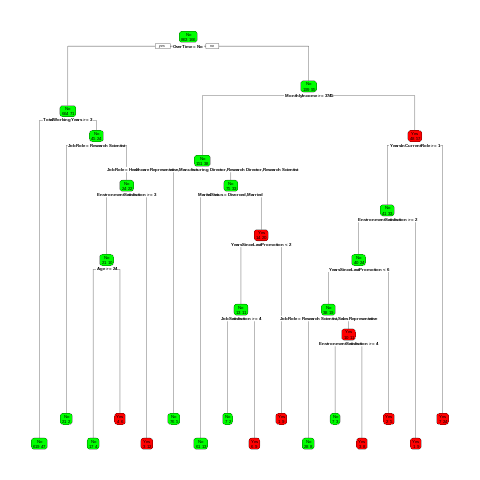

In [93]:
%%R
if (!require("rpart.plot", lib.loc = lib_loc)) install.packages("rpart.plot", lib = lib_loc)
library(rpart.plot, lib.loc = lib_loc)

library(rpart)

model.rpart <- rpart(Attrition ~ TotalWorkingYears + Age + Department + JobLevel + JobRole + MaritalStatus + MonthlyIncome + OverTime
                      + StockOptionLevel + YearsAtCompany + YearsInCurrentRole + YearsWithCurrManager + JobSatisfaction + JobInvolvement + NumCompaniesWorked + EnvironmentSatisfaction
                      + YearsSinceLastPromotion, data = setEntrena, method="class")
rpart.plot(model.rpart, type = 2, extra = 1, box.palette = list("green", "red"))

predice.modelo.rpart <- predict(model.rpart, setTest, type="class")

print(confusionMatrix(table(predice.modelo.rpart, setTest$Attrition)), mode="everything")

La accuracy en general supera a la de Naive Bayes, sin embargo las instancias en las que Attrition es *yes* se clasifican peor. Según la investigación que hemos realizado, el f1-score es una buena métrica para comparar modelos cuando el dataset está desbalanceado. Como se puede apreciar, el valor de este score en este modelo es 0.9159, frente a un 0.8870 del realizado con Naive Bayes. Pero si nos fijamos en la matriz de confusion o en la especifidad, podemos ver que el *yes* se clasifica peor. Esto se debe a que la clase positiva es *no*, se podría cambiar añadiendo "positive="Yes"" a la hora de llamar a la función confusionMatrix(). Sin embargo, hemos preferido dejarlo así para tener una métrica más que nos ayudará a clasificar el modelo que mejor clasifica *no*. Pues para conseguir los resultados que deseamos en el *yes* habrá que balancear el dataset en el futuro, y además podemos compararlos con la especificidad.      

In [ ]:
%%R
temp <- as.data.frame(caret::varImp(model.rpart))
print(temp %>% arrange(desc(Overall)))

                          Overall
TotalWorkingYears       39.871843
MonthlyIncome           37.799417
JobRole                 30.689299
YearsWithCurrManager    29.710155
EnvironmentSatisfaction 27.898672
JobLevel                27.293763
Age                     25.958646
OverTime                21.552770
MaritalStatus           19.481672
StockOptionLevel        18.910028
YearsInCurrentRole       8.667689
Department               6.971852
YearsSinceLastPromotion  6.221922
JobSatisfaction          5.891113
NumCompaniesWorked       4.023053
JobInvolvement           3.817734
YearsAtCompany           3.660200


Según este ranking, pudimos ver que algunos atributos que habiamos mantenido no aportaban información a la hora de emplear el clasificador. En este caso eliminar los atributos EducationField y BusinessTravel beneficia, e incluso Gender puede ser prescindible según los resultados obtenidos al clasificar con o sin él.

#### C5.0

R[write to console]: Loading required package: mvtnorm

R[write to console]: Loading required package: libcoin

R[write to console]: Loading required package: C50

R[write to console]: Loading required package: partykit

R[write to console]: Loading required package: grid



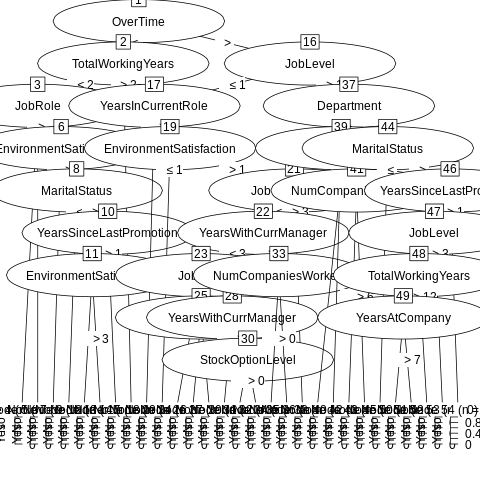

In [ ]:
%%R
if (!require("mvtnorm", lib.loc = lib_loc)) install.packages("mvtnorm", lib = lib_loc)
if (!require("libcoin", lib.loc = lib_loc)) install.packages("libcoin", lib = lib_loc)
if (!require("C50", lib.loc = lib_loc)) install.packages("C50", lib = lib_loc)
library(C50, lib.loc = lib_loc)

if (!require("partykit", lib.loc = lib_loc)) install.packages("partykit", lib = lib_loc)
library(partykit, lib.loc = lib_loc)

set.seed(1)
model.C50 <- C5.0(as.factor(Attrition) ~ TotalWorkingYears + Department + Gender + JobLevel + JobRole + MaritalStatus + MonthlyIncome + OverTime
                + StockOptionLevel + YearsAtCompany + YearsInCurrentRole + YearsWithCurrManager + JobSatisfaction + JobInvolvement + NumCompaniesWorked + EnvironmentSatisfaction
                + YearsSinceLastPromotion, data = setEntrena)
plot(model.C50)

In [ ]:
%%R
predice.modelo.C50 <- predict(model.C50, setTest, type="class")
print(confusionMatrix(table(predice.modelo.C50, setTest$Attrition)), mode="everything")

Confusion Matrix and Statistics

                  
predice.modelo.C50  No Yes
               No  355  50
               Yes  15  21
                                         
               Accuracy : 0.8526         
                 95% CI : (0.816, 0.8844)
    No Information Rate : 0.839          
    P-Value [Acc > NIR] : 0.2403         
                                         
                  Kappa : 0.3187         
                                         
 Mcnemar's Test P-Value : 2.474e-05      
                                         
            Sensitivity : 0.9595         
            Specificity : 0.2958         
         Pos Pred Value : 0.8765         
         Neg Pred Value : 0.5833         
              Precision : 0.8765         
                 Recall : 0.9595         
                     F1 : 0.9161         
             Prevalence : 0.8390         
         Detection Rate : 0.8050         
   Detection Prevalence : 0.9184         
      Balanced Accuracy : 0

Peor incluso que el anterior, specificity muy baja por lo que el *yes* se clasifica con menor precisión. 

Como se puede apreciar se sigue consiguiendo una mejor accuracy que en el primer modelo probado, sin embargo esto no es determinante, pues nos interesa un modelo que clasifique las dos clases posibles igual de bien. 

También es cierto que el índice kappa es menor en estos dos últimos modelos que en el primero, lo cual indica que la concordancia entre las frecuencias de
ocurrencia de cada clase y las frecuencias obtenidas al usar el clasificador es menor. Según Landis y Koch en el primer modelo obtendríamos prácticamente una concordancia moderada, mientras en estos dos últimos sería claramente discreta.

Para poder visualizar mejor el modelo lo hemos obtenido en forma de reglas, pues al haber tan alto número de atributos el árbol es ilegible.

In [ ]:
%%R
summary(C5.0(as.factor(Attrition) ~ TotalWorkingYears + Department + Gender + JobLevel + JobRole + MaritalStatus + MonthlyIncome + OverTime
                + StockOptionLevel + YearsAtCompany + YearsInCurrentRole + YearsWithCurrManager + JobSatisfaction + JobInvolvement + NumCompaniesWorked + EnvironmentSatisfaction
                + YearsSinceLastPromotion, data = setEntrena, rules = TRUE))


Call:
C5.0.formula(formula = as.factor(Attrition) ~ TotalWorkingYears + Department
 NumCompaniesWorked + EnvironmentSatisfaction + YearsSinceLastPromotion, data
 = setEntrena, rules = TRUE)


C5.0 [Release 2.07 GPL Edition]  	Sun Dec 12 18:19:49 2021
-------------------------------

Class specified by attribute `outcome'

Read 1029 cases (18 attributes) from undefined.data

Rules:

Rule 1: (71/3, lift 1.1)
	MaritalStatus = Single
	OverTime = No
	EnvironmentSatisfaction > 3
	->  class No  [0.945]

Rule 2: (402/23, lift 1.1)
	MaritalStatus in {Married, Divorced}
	OverTime = No
	EnvironmentSatisfaction > 1
	->  class No  [0.941]

Rule 3: (146/8, lift 1.1)
	StockOptionLevel > 0
	YearsWithCurrManager > 1
	YearsWithCurrManager <= 3
	EnvironmentSatisfaction > 1
	->  class No  [0.939]

Rule 4: (62/3, lift 1.1)
	YearsInCurrentRole > 0
	JobInvolvement > 3
	EnvironmentSatisfaction > 1
	->  class No  [0.938]

Rule 5: (365/22, lift 1.1)
	Department = Research & Development
	JobLevel > 1
	->  class

Hemos podido observar que la clasificación era mejor sin el atributo Age, por lo que en este caso hemos prescindido de él.

A continuación probamos con la versión **boost** del modelo.

In [ ]:
%%R
modelo.C50boost <- C5.0(as.factor(Attrition) ~ TotalWorkingYears + Department + Gender + JobLevel + JobRole + MaritalStatus + MonthlyIncome + OverTime
                + StockOptionLevel + YearsAtCompany + YearsInCurrentRole + YearsWithCurrManager + JobSatisfaction + JobInvolvement + NumCompaniesWorked + EnvironmentSatisfaction
                + YearsSinceLastPromotion, data = setEntrena, trials = 10) #Se especifican 10 iteraciones de "boosting"
predice.modelo.C50boost <- predict(modelo.C50boost, setTest)
confusionMatrix(table(predice.modelo.C50boost, setTest$Attrition), mode="everything")

Confusion Matrix and Statistics

                       
predice.modelo.C50boost  No Yes
                    No  363  55
                    Yes   7  16
                                          
               Accuracy : 0.8594          
                 95% CI : (0.8234, 0.8905)
    No Information Rate : 0.839           
    P-Value [Acc > NIR] : 0.1346          
                                          
                  Kappa : 0.284           
                                          
 Mcnemar's Test P-Value : 2.387e-09       
                                          
            Sensitivity : 0.9811          
            Specificity : 0.2254          
         Pos Pred Value : 0.8684          
         Neg Pred Value : 0.6957          
              Precision : 0.8684          
                 Recall : 0.9811          
                     F1 : 0.9213          
             Prevalence : 0.8390          
         Detection Rate : 0.8231          
   Detection Prevalence : 0.94

Mejora un poco con respecto al modelo original, sin boost. Sin embargo, tan solo mejora la clasificacion de la clase mayoritaria.

### Random Forest

R[write to console]: Loading required package: randomForest

R[write to console]: randomForest 4.6-14

R[write to console]: Type rfNews() to see new features/changes/bug fixes.

R[write to console]: 
Attaching package: ‘randomForest’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    margin




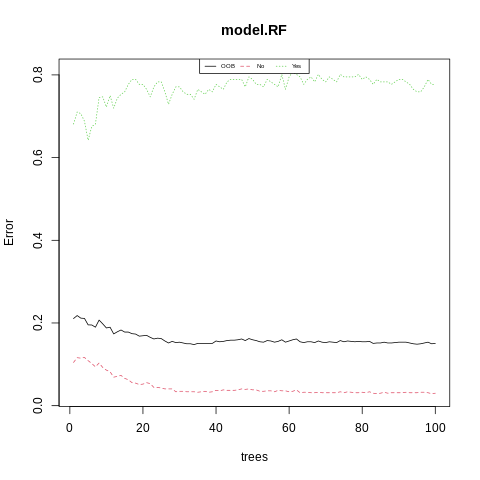

In [ ]:
%%R
if (!require("randomForest", lib.loc = lib_loc)) install.packages("randomForest", lib = lib_loc)
library(randomForest, lib.loc = lib_loc)

set.seed(1)
model.RF <- randomForest(as.factor(Attrition) ~ TotalWorkingYears + Age + Department + Gender + JobLevel + JobRole + MaritalStatus + MonthlyIncome + OverTime
                + StockOptionLevel + YearsAtCompany + YearsInCurrentRole + YearsWithCurrManager + JobSatisfaction + JobInvolvement + NumCompaniesWorked + EnvironmentSatisfaction
                + YearsSinceLastPromotion + EducationField + BusinessTravel, data = setEntrena, ntree = 100, importance = TRUE)
plot(model.RF)
model.RF.leyenda <- if (is.null(model.RF$test$err.rate)) {colnames(model.RF$err.rate)} 
                    else {colnames(model.RF$test$err.rate)}
legend("top", cex =0.5, legend = model.RF.leyenda, lty=c(1,2,3,4), col=c(1,2,3,4), horiz = TRUE)

En esta gráfica podemos ver el número de árboles óptimo para que el error al clasificar de cada uno de los posibles valores de la clase se minimice. A su vez, podemos ver gráficamente lo que ya sabiamos, que el error de la clase *yes* es mucho más alto que el del *no*.

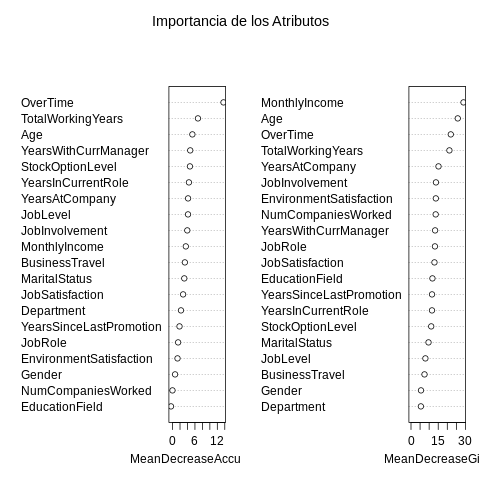

In [ ]:
%%R
varImpPlot(model.RF, sort = TRUE, main = "Importancia de los Atributos", n.var = 20)

Se ratifica que los mejores atributos son los que veniamos observando en los modelos anteriores y que hay otros que apenas aportan información.

### SVM (Maquinas de Soporte Vectorial)

In [ ]:
%%R
if (!require("e1071", lib.loc = lib_loc)) install.packages("e1071", lib = lib_loc)
library(e1071, lib.loc = lib_loc)

# Se convierte la variable respuesta a factor

# Para que la función svm() calcule el Support Vector Classifier,
# se tiene que indicar que la función kernel es lineal.
model.svm <- svm(formula = as.factor(Attrition) ~ TotalWorkingYears + Age + Department + Gender + JobLevel + JobRole + MaritalStatus + MonthlyIncome + OverTime
                + StockOptionLevel + YearsAtCompany + YearsInCurrentRole + YearsWithCurrManager + JobSatisfaction + JobInvolvement + NumCompaniesWorked + EnvironmentSatisfaction
                + YearsSinceLastPromotion + EducationField + BusinessTravel,
                  data = setEntrena, 
                  type = 'C-classification',
                  kernel = "linear"
                  #cost = 10, 
)
predice.modelo.svm <- predict(model.svm, setTest)
confusionMatrix(table(predice.modelo.svm, setTest$Attrition), mode="everything")

Confusion Matrix and Statistics

                  
predice.modelo.svm  No Yes
               No  360  44
               Yes  10  27
                                          
               Accuracy : 0.8776          
                 95% CI : (0.8433, 0.9067)
    No Information Rate : 0.839           
    P-Value [Acc > NIR] : 0.014           
                                          
                  Kappa : 0.438           
                                          
 Mcnemar's Test P-Value : 7.098e-06       
                                          
            Sensitivity : 0.9730          
            Specificity : 0.3803          
         Pos Pred Value : 0.8911          
         Neg Pred Value : 0.7297          
              Precision : 0.8911          
                 Recall : 0.9730          
                     F1 : 0.9302          
             Prevalence : 0.8390          
         Detection Rate : 0.8163          
   Detection Prevalence : 0.9161          
      B

Con SVM conseguimos el valor más alto de accuracy para todos los modelos probados. El valor del índice kappa también es el más alto. Sin embargo, la especificidad no es la más alta. Se tendrá en cuenta como candidato aún así, pues dependiendo del objetivo de la clasificación que queramos hacer, podría ser bueno o no.

### KNN (K-Nearest Neighbors)

Atributos solo numericos

In [ ]:
%%R
setEntrenaNUM <- setEntrena
setTestNUM <- setTest

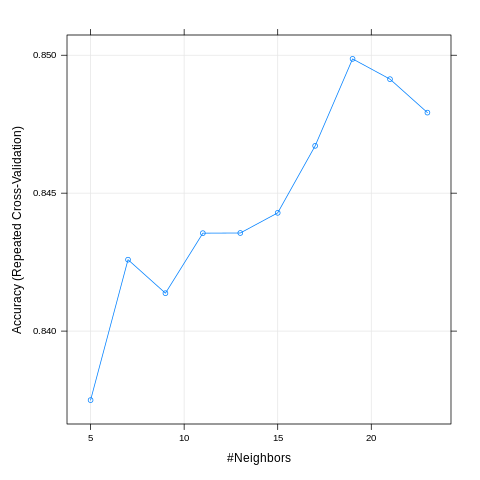

In [ ]:
%%R
set.seed(1)
model.KNN <- train(Attrition ~ TotalWorkingYears + Age + Department + Gender + JobLevel + JobRole + MaritalStatus + MonthlyIncome + OverTime
                + StockOptionLevel + YearsAtCompany + YearsInCurrentRole + YearsWithCurrManager + JobSatisfaction + JobInvolvement + NumCompaniesWorked + EnvironmentSatisfaction
                + YearsSinceLastPromotion,
                   data = setEntrenaNUM, 
                   method = "knn",
                   trControl=trainControl(method = "repeatedcv", number = 8, repeats = 4),
                   preProcess = c("center", "scale"), 
                   tuneLength = 10)
plot(model.KNN)

Se aprecia que la mayor ACC se obtiene con un vecindario de 19.

In [ ]:
%%R
predice.modelo.KNN <- predict(model.KNN, setTestNUM)
c <- confusionMatrix(table(predice.modelo.KNN, setTestNUM$Attrition), mode="everything")
print(c)

Confusion Matrix and Statistics

                  
predice.modelo.KNN  No Yes
               No  368  63
               Yes   2   8
                                         
               Accuracy : 0.8526         
                 95% CI : (0.816, 0.8844)
    No Information Rate : 0.839          
    P-Value [Acc > NIR] : 0.2403         
                                         
                  Kappa : 0.1643         
                                         
 Mcnemar's Test P-Value : 9.911e-14      
                                         
            Sensitivity : 0.9946         
            Specificity : 0.1127         
         Pos Pred Value : 0.8538         
         Neg Pred Value : 0.8000         
              Precision : 0.8538         
                 Recall : 0.9946         
                     F1 : 0.9189         
             Prevalence : 0.8390         
         Detection Rate : 0.8345         
   Detection Prevalence : 0.9773         
      Balanced Accuracy : 0

Comparado con los modelos ya conseguidos, este con KNN, queda descartado, pues es el que peor clasifica la clase minoritaria.

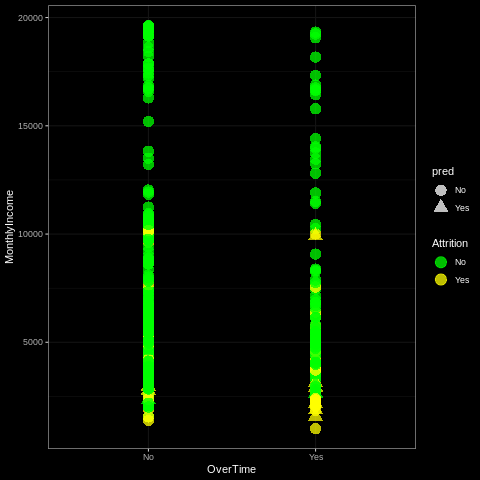

In [ ]:
%%R
if (!require("ggdark", lib.loc = lib_loc)) devtools::install_github("nsgrantham/ggdark", lib = lib_loc)
library(ggdark, lib.loc = lib_loc)

dfplot <- setTest
dfplot$pred <- predice.modelo.KNN
ggplot(dfplot) +
  geom_point(aes(OverTime, MonthlyIncome, color = Attrition, shape = pred), size = 5, alpha = 0.75) +
  scale_color_manual(values=c("#00FF00", "#FFFF00", "#FF0000")) +
  dark_theme_bw()

### **CONCLUSIONES CLASIFICACIÓN**

Como hemos venido observando la mayoría de los modelos clasificaban de manera poco precisa la clase yes, esto se debe al desbalanceo de los datos mencionado, debajo se propone un trabajo futuro que podría arreglar esta cuestión.

Teniendo en cuenta esto y en el punto en el que estamos ahora, si tuvieramos que elegir uno de los modelos, nuestra elección estaría entre el conseguido con SVM y el de Naive Bayes. 

En el primero conseguimos mejores resultados en cuanto a accuracy  general, pues la clase mayoritaria NO, se clasifica bien un 97,3% 
de las veces. Debido a esto el f1-score posee un buen valor, 0,93. También conseguimos un índice Kappa de 0.438, el más alto de todos los observados. Sin embargo, la clasificación de la clase YES no obtiene tan buenos resultados, pues se clasificaría mejor incluso si se hiciera de manera aleatoria.

Debido a esto creemos que en este punto el mejor modelo sería el de Naive Bayes. Este obtiene valores más bajos en las métricas anteriormente mencionadas, pero aún así, siguen siendo bastante aceptables. Este es el único modelo conseguido que aún teniendo el desbalanceo de datos todavía presente consigue clasificar la clase YES correctamente por encima del 50% de las veces, en concreto casi un 60% de ellas. A cambio se clasifica un poco peor el NO, pero es el precio a pagar en este punto por un modelo equilibrado.

A continuación, se exponen las posibles técnicas que se podrían aplicar en el futuro con el fin de conseguir modelos aún más precisos.



### **TRABAJOS FUTUROS**


Como trabajo futuro se podría realizar un balanceo de los datos, pues como se ha podido observar el número de instancias con Atrittion *yes* es mucho menor que en las que es no. Esto causa que las instancias con *yes* no se clasifiquen correctamente con la mayoría de los clasificadores. Para mejorar esta situación se podrían emplear las siguientes estrategias: 

1.	**Ajuste de parámetros del modelo**: Consiste en ajustar parametros ó metricas del propio algoritmo para intentar equilibrar a la clase minoritaria penalizando a la clase mayoritaria durante el entrenamiento. Esto se podría realizar con con ajuste de peso en árboles. No todos los algoritmos tienen estas posibilidades. En redes neuronales, por ejemplo, podríamos ajustar la métrica de Loss para que penalice a las clases mayoritarias.
2.	**Modificar el Dataset**: podemos eliminar muestras de la clase mayoritaria para reducirlo e intentar equilibrar la situación. Tiene como “peligroso” que podemos prescindir de muestras importantes, que brindan información y por lo tanto empeorar el modelo. Entonces para seleccionar qué muestras eliminar, deberíamos seguir algún criterio. También podríamos agregar nuevas filas con los mismos valores de las clases minoritarias, por ejemplo cuadriplicar las filas. Pero esto no sirve demasiado y podemos llevar al modelo a caer en overfitting.
3.	**Muestras artificiales**: podemos intentar crear muestras sintéticas (no idénticas) utilizando diversos algoritmos que intentan seguir la tendencia del grupo minoritario. Según el método, podemos mejorar los resultados. Lo peligroso de crear muestras sintéticas es que podemos alterar la distribución “natural” de esa clase y confundir al modelo en su clasificación.
4.	**Balanced Ensemble Methods**: Utiliza las ventajas de hacer ensamble de métodos, es decir, entrenar diversos modelos y entre todos obtener el resultado final (por ejemplo “votando”) pero se asegura de tomar muestras de entrenamiento equilibradas.

Quizá con alguna de estas técnicas podríamos llegar a obtener mejores resultados.




## AGRUPAMIENTO (CLUSTERING)

Otro de los objetivos finales era utilizar técnicas de clustering para encontrar propiedades comunes en el conjunto de datos, es decir, observar los distintos perfiles que existen en la empresa y ver si existe una clara diferencia entre los que abandonan el puesto de trabajo y los que no.

In [ ]:
%%R
library(dplyr)
if (!require("caret", lib.loc = lib_loc)) install.packages("caret", lib = lib_loc)
library(caret, lib.loc = lib_loc)

dfMedidas_CLUS <- dfDatos %>% select(c(TotalWorkingYears, Age, JobLevel, MonthlyIncome, StockOptionLevel, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, 
                                       JobSatisfaction, JobInvolvement, NumCompaniesWorked, EnvironmentSatisfaction ,YearsSinceLastPromotion))

dfMedidas_CLUS <- na.omit(dfMedidas_CLUS) #eliminamos instancias si no tienen algún valor
dfMedidas_CLUSscale <- as.data.frame(scale(dfMedidas_CLUS)) # estandarizamos los atributos

Length  Class   Mode 
     0   NULL   NULL 


Para realizar este agrupamiento, se requiere que los datos sean numéricos, por lo que será necesario binarizar los atributos nominales y estandarizar todos. Se han añadido unicamente los atributos numericos que más información nos daban al realizar la clasificación en el apartado anterior, con el fin de estudiarlos más en profundidad y obtener otras conclusiones de los mismos.

### Agrupacion Jerarquica

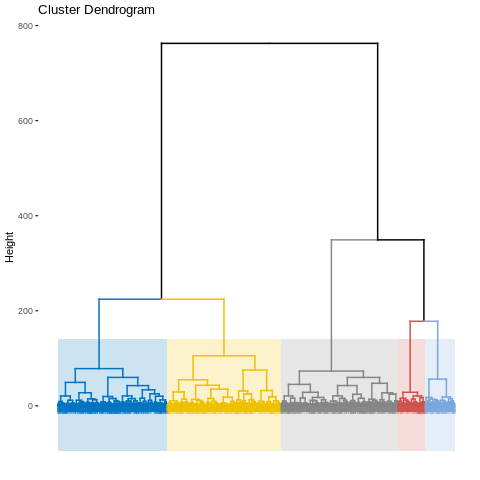

In [ ]:
%%R
if (!require("ggpubr", lib.loc = lib_loc)) install.packages("ggpubr", lib = lib_loc)
if (!require("ggsci", lib.loc = lib_loc)) install.packages("ggsci", lib = lib_loc)
if (!require("dendextend", lib.loc = lib_loc)) install.packages("dendextend", lib = lib_loc)
if (!require("factoextra", lib.loc = lib_loc)) install.packages("factoextra", lib = lib_loc)
library(factoextra, lib.loc = lib_loc)

distancia <- dist(dfMedidas_CLUSscale, method = "euclidean") #matriz de distancias euclídeas
clus_hc <- hclust(distancia, method="ward.D")

fviz_dend(clus_hc, k = 5, cex = 0.25, k_colors = "jco", color_labels_by_k = TRUE, rect = TRUE, rect_border = "jco", rect_fill = TRUE)

En primer lugar, empleamos el método de agrupación jerárquica, que agrupa las dos instancias de datos más próximas. Esto nos sirvió para poner de manifiesto cuál es le número adecuado de agrupamientos, ya que no podíamos obtener ninguna conclusión de este primer diagrama.

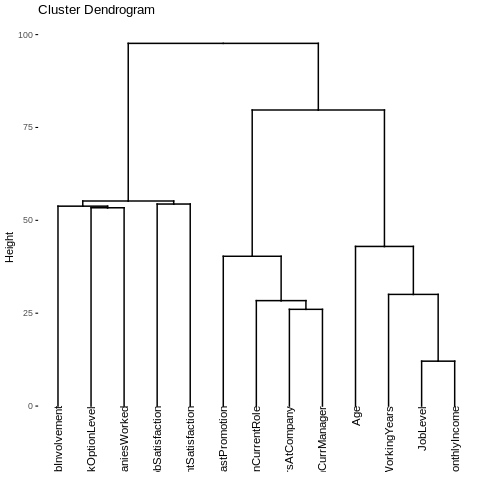

In [ ]:
%%R
distanciaT <- dist(t(dfMedidas_CLUSscale), method = "euclidean") #matriz de distancias euclídeas
clus_hcT <- hclust(distanciaT, method="ward.D")
fviz_dend(clus_hcT)

Tenemos que saber si el conjunto de datos es susceptible de agruparse. Para ello utilizamos diferentes estadísticos y representaciones gráficas.

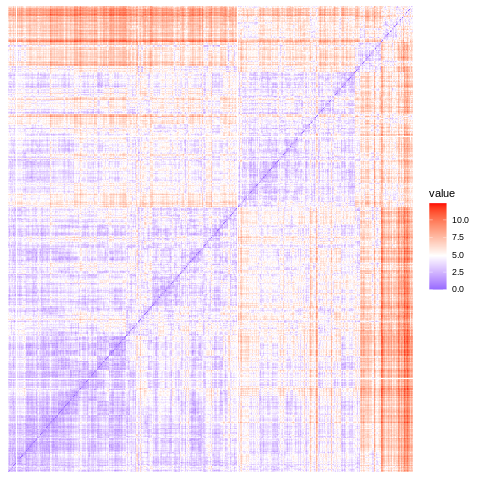

In [ ]:
%%R
if (!require("reshape", lib.loc = lib_loc)) install.packages("reshape", lib = lib_loc)
library(reshape, lib.loc = lib_loc)
if (!require("reshape2", lib.loc = lib_loc)) install.packages("reshape2", lib = lib_loc)
library(reshape2, lib.loc = lib_loc)

fviz_dist(distancia, 
          gradient = list(low = "blue", mid = "white", high = "red"),
          order = TRUE, show_labels = FALSE)

Se puede ver que hay cierta separación en los datos sobre la esquina superior derecha frente al resto, coloreados en un tono rojizo frente al morado de la parte inferior izquierda.

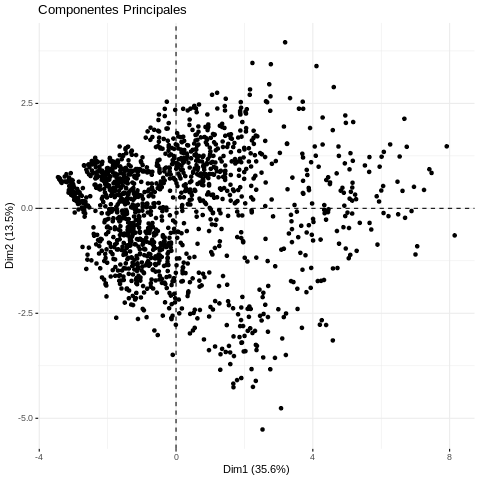

In [ ]:
%%R
fviz_pca_ind(prcomp(dfMedidas_CLUSscale), title = "Componentes Principales", 
             geom = "point")

También se puede distinguir un grupo bastante claro, aunque no perfectamente separable pues los datos del primer cuadrante estan muy juntos y superpuestos

**Estadistico de Hopkins**
Permite determinar si hay agrupaciones

In [ ]:
%%R
get_clust_tendency(dfMedidas_CLUSscale, n = nrow(dfMedidas_CLUSscale)-1, graph = FALSE)

$hopkins_stat
[1] 0.697892

$plot
NULL



Al estar muy cercano a 0.7, nos indica que se muestra una cierta tendencia a estar agrupados, pero muy al límite, es decir, que los datos no están distribuidos uniformemente, pero tampoco tienen una tendencia demasiado elevada y clara.

### Numero Óptimo de Agrupaciones

La librería *NbClust* incorpora 30 medidas diferentes para determinar el número óptimo de agrupaciones.

R[write to console]: Loading required package: NbClust



*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 11 proposed 2 as the best number of clusters 
* 7 proposed 3 as the best number of clusters 
* 3 proposed 5 as the best number of clusters 
* 1 proposed 8 as the best number of clusters 
* 2 proposed 15 as the best numbe

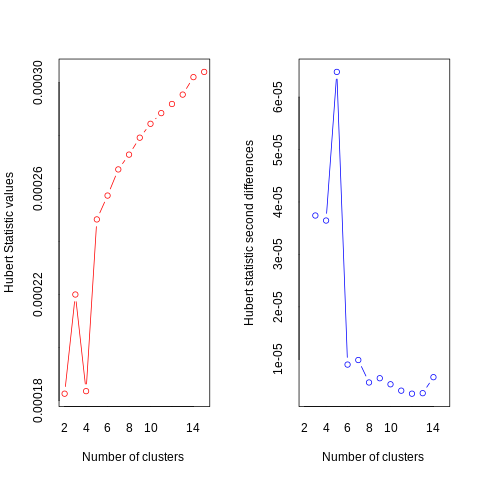

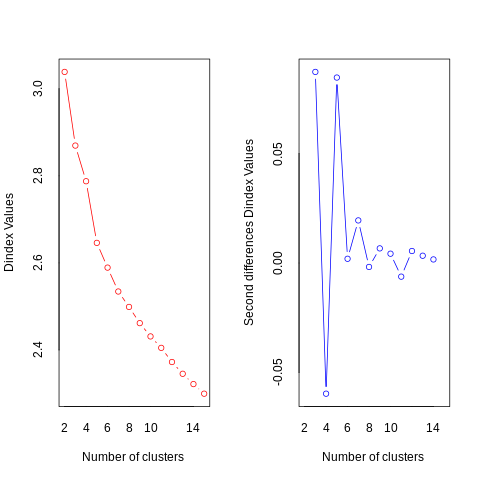

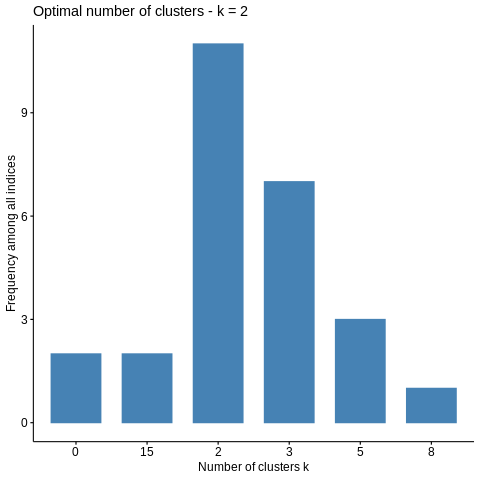

In [ ]:
%%R
if (!require("NbClust", lib.loc = lib_loc)) install.packages("NbClust", lib = lib_loc)
library(NbClust, lib.loc = lib_loc)

set.seed(123)
fviz_nbclust(NbClust(dfMedidas_CLUSscale, distance = "euclidean", min.nc = 2, max.nc = 15, method = "kmeans", index = "all"))

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 7 proposed 2 as the best number of clusters 
* 1 proposed 3 as the best number of clusters 
* 4 proposed 5 as the best number of clusters 
* 10 proposed 6 as the best number of clusters 
* 1 proposed 14 as the best numbe

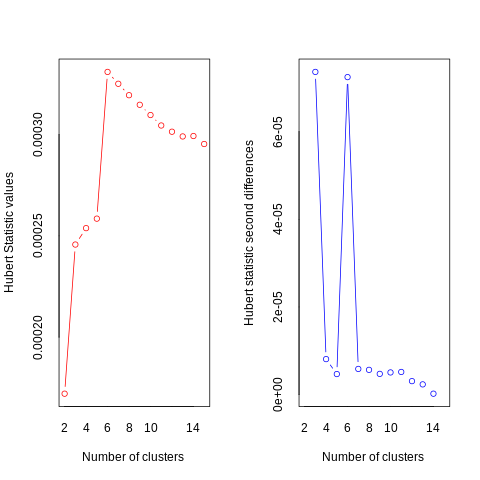

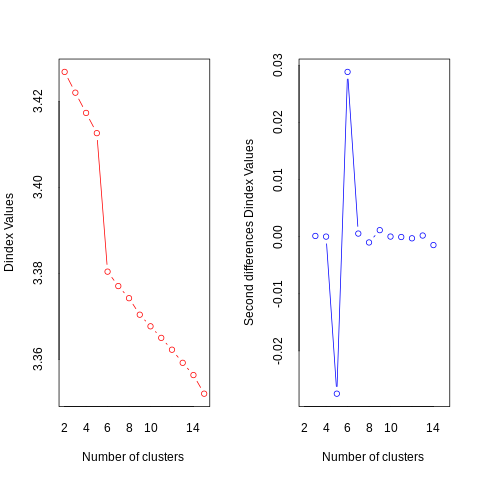

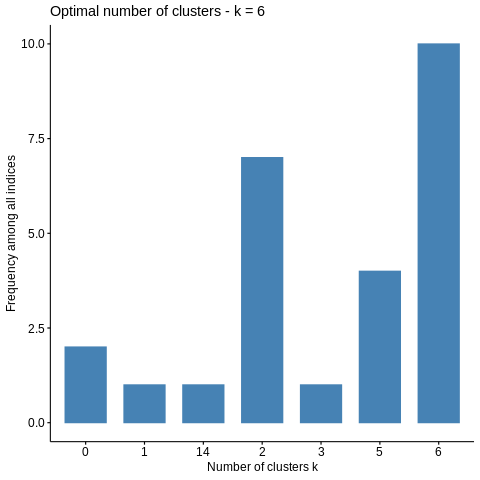

In [ ]:
%%R
if (!require("NbClust", lib.loc = lib_loc)) install.packages("NbClust", lib = lib_loc)
library(NbClust, lib.loc = lib_loc)

set.seed(123)
fviz_nbclust(NbClust(dfMedidas_CLUSscale, distance = "euclidean", min.nc = 2, max.nc = 15, method = "median", index = "all"))

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 9 proposed 2 as the best number of clusters 
* 1 proposed 3 as the best number of clusters 
* 5 proposed 6 as the best number of clusters 
* 7 proposed 7 as the best number of clusters 
* 1 proposed 8 as the best number 

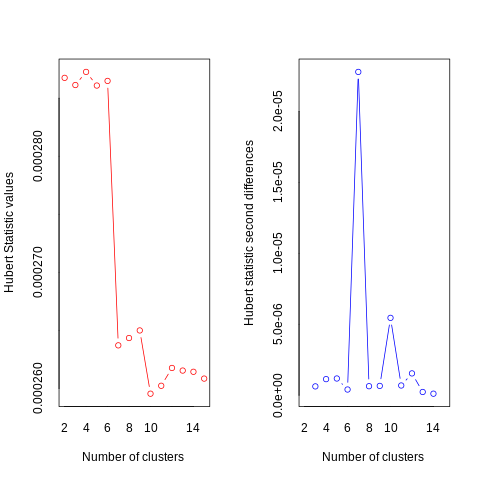

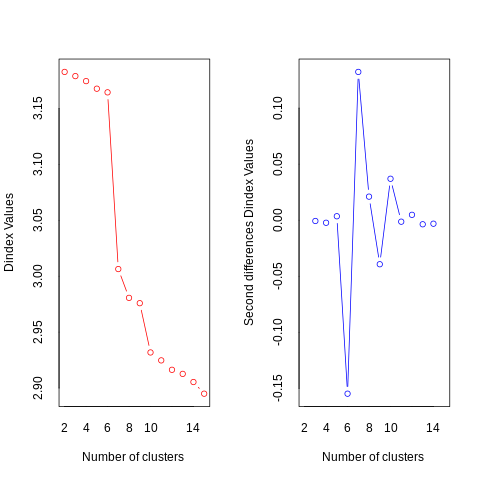

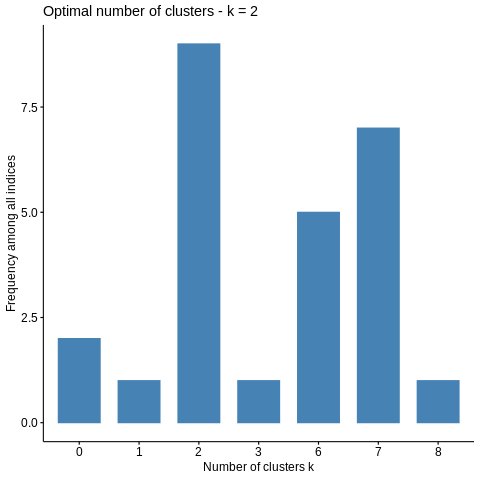

In [ ]:
%%R
if (!require("NbClust", lib.loc = lib_loc)) install.packages("NbClust", lib = lib_loc)
library(NbClust, lib.loc = lib_loc)

set.seed(123)
fviz_nbclust(NbClust(dfMedidas_CLUSscale, distance = "euclidean", min.nc = 2, max.nc = 15, method = "average", index = "all"))

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 9 proposed 2 as the best number of clusters 
* 2 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 8 proposed 6 as the best number of clusters 
* 1 proposed 9 as the best number 

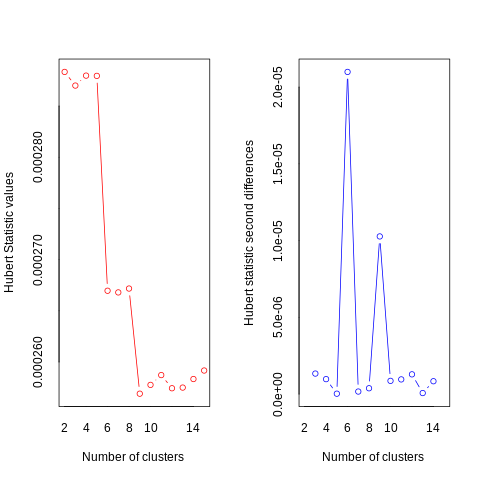

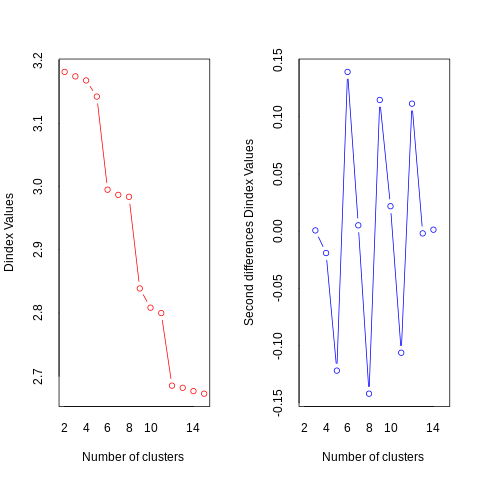

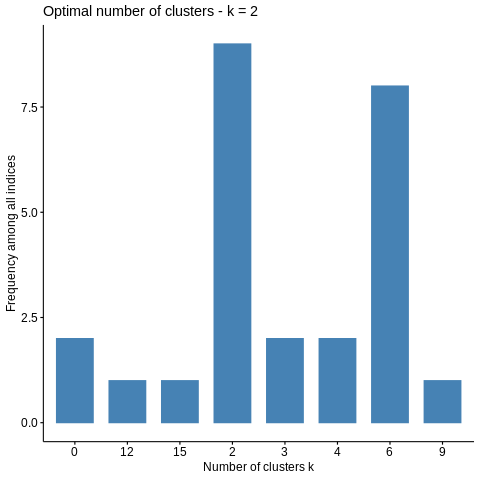

In [ ]:
%%R
if (!require("NbClust", lib.loc = lib_loc)) install.packages("NbClust", lib = lib_loc)
library(NbClust, lib.loc = lib_loc)

set.seed(123)
fviz_nbclust(NbClust(dfMedidas_CLUSscale, distance = "euclidean", min.nc = 2, max.nc = 15, method = "mcquitty", index = "all"))

Realizando distintas pruebas cambiando el método de análisis del cluster, probando el "kmeans", el "median", el "avarage" y el "mcquitty", vemos que 3 de los 4 nos dicen que el número de agrupaciones más frecuente es 2

Por lo tanto, aplicando el agrupamiento jerárquico para tener 2 grupos (el óptimo que hemos obtenido) obtenemos los siguientes resultados:

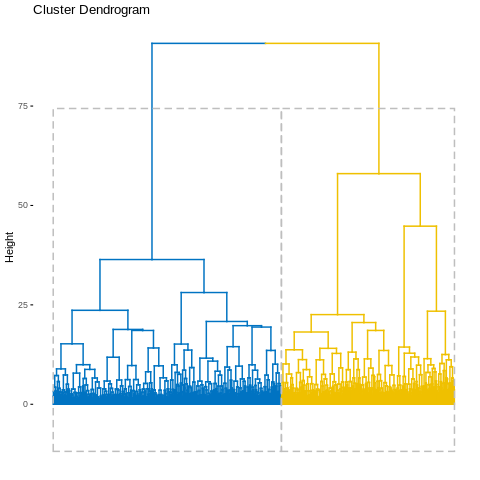

In [ ]:
%%R
res_HC <- eclust(dfMedidas_CLUSscale, "hclust", k = 2, graph = TRUE)
fviz_dend(res_HC, palette = "jco", rect = TRUE, show_labels = FALSE)

Se puede representar en los ejes de los dos primeros componentes principales de las clases obtenidas

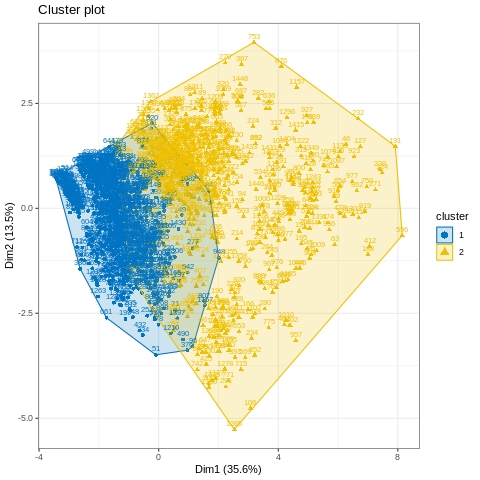

In [ ]:
%%R
fviz_cluster(res_HC, data = dfMedidas_CLUSscale, ellipse.type = "convex", palette = "jco", labelsize = 8) + theme_bw()

Como se puede ver, existe mucho solapamiento entre los datos, lo que nos lleva a pensar que quizá no se puede realizar una correcta clusterizacion entre las dos clases, es decir, parece que el resultado no es demasiado bueno.

### Agrupamiento por Particionamiento


En estos métodos, cada grupo es representado por un prototipo y la asignación de los datos se realiza asignando cada uno de ellos al prototipo más próximo.

**KNN**
El algoritmo más utilizado es *K-means*, en el que los prototipos de las clases son los centroides.

In [ ]:
%%R
set.seed(123) #Lo logico seria cambiar la semilla para ver como de robustos son resultados obtenidos
res_KM <- kmeans(dfMedidas_CLUSscale, 2, nstart = 25)
print(res_KM$centers)

  TotalWorkingYears        Age   JobLevel MonthlyIncome StockOptionLevel
1        -0.4649752 -0.2942845 -0.4688065    -0.4537316      -0.03437254
2         1.0241611  0.6481953  1.0326000     0.9993958       0.07570944
  YearsAtCompany YearsInCurrentRole YearsWithCurrManager JobSatisfaction
1     -0.4386970         -0.4260926           -0.4015328    0.0003715642
2      0.9662804          0.9385176            0.8844219   -0.0008184127
  JobInvolvement NumCompaniesWorked EnvironmentSatisfaction
1   5.390067e-05        -0.02527134             -0.03231198
2  -1.187224e-04         0.05566302              0.07117082
  YearsSinceLastPromotion
1              -0.3667482
2               0.8078048


Podemos apreciar que la clase C1 se corresponde con la gente joven que gana menos dinero y lleva menos tiempo en la empresa y, por lo tanto, menos tiempo con el mismo jefe y en el mismo puesto. La clase 2, por el contrario, ha trabajado más años, es más mayor, ha recibido un ascenso hace menos tiempo y ha trabajado en más compañias/empresas.

In [ ]:
%%R
mu <- colMeans(dfMedidas_CLUS)    
sd <- sapply(dfMedidas_CLUS, sd)
round(t(t(res_KM$centers)*sd + mu), 1)

  TotalWorkingYears  Age JobLevel MonthlyIncome StockOptionLevel YearsAtCompany
1               7.7 34.2      1.5        4366.8              0.8            4.3
2              19.2 42.8      3.2       11208.0              0.9           12.9
  YearsInCurrentRole YearsWithCurrManager JobSatisfaction JobInvolvement
1                2.7                  2.7             2.7            2.7
2                7.6                  7.3             2.7            2.7
  NumCompaniesWorked EnvironmentSatisfaction YearsSinceLastPromotion
1                2.6                     2.7                     1.0
2                2.8                     2.8                     4.8


Aqui se ve mejor con la estandarizacion revertida. Observamos que la satisfacción en el trabajo y la participación laboral son atributos que no dividen para nada las dos clases. Otros como el número de empresas en las que ha trabajado el empleado, el grado de satisfacción del cliente con el entorno o el nivel de opción sobre acciones son muy poco notables a la hora de dividir los datos. Por último, los valores más importantes son el salario que ganan, el total de años que han trabajado y el número de años en la compañía.

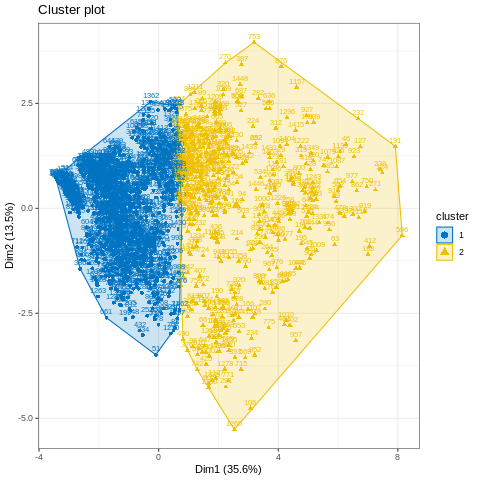

In [ ]:
%%R
fviz_cluster(res_KM, data = dfMedidas_CLUSscale, ellipse.type = "convex",
             palette = "jco", labelsize = 8) +
             theme_bw()

En el gráfico observamos que utilizando *k-medias* casi no hay solapamiento entre clases, por lo que quizá si que se pueden agrupar los datos en dos clases diferentes. 

**Analisis**

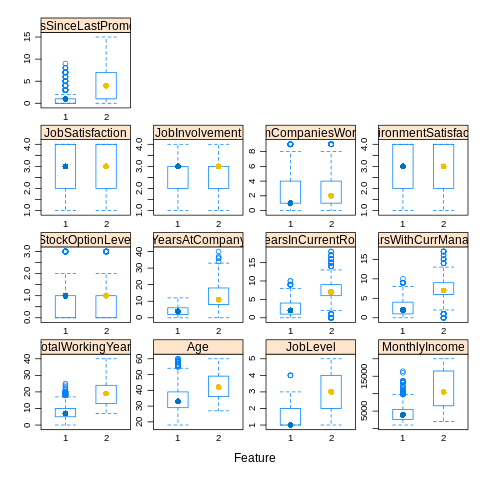

In [ ]:
%%R
if (!require("caret", lib.loc = lib_loc)) install.packages("caret", lib = lib_loc)
library(caret, lib.loc = lib_loc)

featurePlot(x = dfMedidas_CLUS, y = as.factor(res_KM$cluster), plot = "box",
col = c("#0073C2FF", "#EFC000FF", "#868686FF"),
scales = list(x = list(relation = "free"), y = list(relation = "free")))

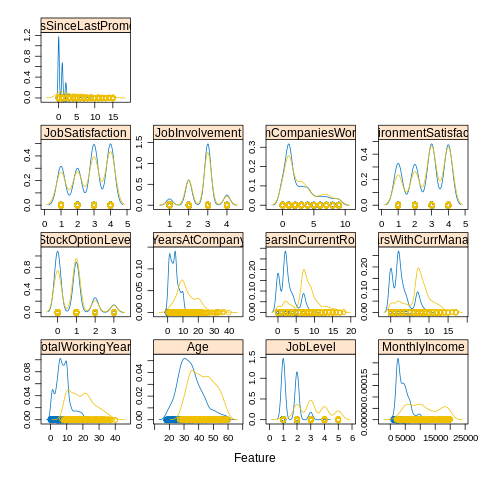

In [ ]:
%%R
featurePlot(x = dfMedidas_CLUS, y = as.factor(res_KM$cluster), plot = "density",
col = c("#0073C2FF", "#EFC000FF", "#868686FF"),
scales = list(x = list(relation = "free"), y = list(relation = "free")))

Como hemos dicho previamente, JobSatisfaction, JobInvolvement, EnvironmentSatisfaction, NumCompaniesWorked y StockOptionLevel entorpecen el agrupamiento, ya que tienen practicamente los mismos valores.

### Validación de Resultados



Posibles medidas del rendimiento son:
* Clases compactas. Variación de las instancias que pertenecen a la misma clase. Dan lugar a varios índices dependiendo si usan la varianza, las distancias medias, entre las instancias, entre las instancias y los centroides, etc.
* Separación. Medida de separación entre las clases. De nuevo, igual que para medir cómo de compactas son las clases, se puede usar la distancia entre centroides, entre instancias y centroides, etc.
* Híbridos. De las anteriores medidas se realizan combinaciones para obtener índices sintéticos. Por ejemplo, el índice de Dunn o el índice silhouette.
* Conectividad. Densidad de instancias en las clases.
* Pureza. Si se conocen las clases a priori pueden realizarse las medidas de bondad propias de los problemas de clasificación; precisión, pureza, especificidad, etc.

Hemos usado diferentes índices de desempeño utilizando la librería *fpc*.

In [ ]:
%%R
distancia <- dist(dfMedidas_CLUSscale, method = "euclidean")

In [ ]:
%%R
if (!require("fpc", lib.loc = lib_loc)) install.packages("fpc", lib = lib_loc)
library(fpc, lib.loc = lib_loc)

res_stats <- cluster.stats(distancia, res_KM$cluster)

print(res_stats$average.between) # distancia media entre clases
print(res_stats$average.within)  # distancia media intra-clases
print(res_stats$avg.silwidth)    # silhouette
print(res_stats$pearsongamma)
print(res_stats$dunn)            # índice de Dunn
print(res_stats$entropy)         # entropía de la distribución de pertenencia a las clases
print(res_stats$wb.ratio)        # relación entre average.within/average.between
print(res_stats$ch)              # índice de Calinski and Harabasz
print(res_stats$widestgap)       # máxima distancia entre clases
print(res_stats$sindex)          # separación

R[write to console]: Loading required package: fpc



[1] 5.825881
[1] 4.283153
[1] 0.2533744
[1] 0.5373483
[1] 0.07148721
[1] 0.6208851
[1] 0.735194
[1] 457.3635
[1] 3.661891
[1] 1.588732


Podemos observar que los datos obtenidos se dividen bastante bien en dos clases, y los resultados son compactos y con poca separación, como se puede observar en las medidas de rendimiento descritas más arriba.

Según la distancia media entre clases y la separación, podemos observar, como vimos antes en el gráfico, que si que se consiguen diferenciar dos agrupamientos o perfiles diferentes.

El índice de Dunn, por ejemplo, es la relación entre el mínimo de distancia entre cluster y el máximo de distancia entre clúster, y cuanto mayor sea, mejor serán los clusters. Por lo tanto, la distancia entre los clusters más cercanos debe ser mayor. En nuestro caso, nos da un valor de 0.071 aproximadamente.

El índice Calinski-Harabasz se basa en la relación entre la varianza entre los grupos y la varianza dentro de los grupos, de manera que un valor mayor del cociente indica una mejor partición. Nosotros hemos obtenido un valor de 457.36.

### **CONCLUSIONES CLUSTERING**

Como conclusión, parece que tiene sentido dividir en dos los datos y seguramente se correspondan con los distintos perfiles de empleados que abandonan la empresa y empleados que no. Como hemos podido ver previamente, los primero suelen ser más jóvenes y qué ganan menos dinero, que es seguramente por lo que deciden irse.

### **TRABAJOS FUTUROS**

Finalmente, como trabajos futuros, se podría realizar un análisis todavía mas exhaustivo de los valores atípicos para poder dividir mejor las distintas clases de manera casi perfecta.